In [1]:
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *

/data/nasif12/home_if12/l_pock/.conda/envs/tap_scgenetics_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
chr6_annotations=pd.read_pickle ("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/annotations/chr6_data.pkl")

In [3]:
chr6_annotations

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Cells (adata)                                          ┃ Donors (gdata)                                         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ View of AnnData object with n_obs × n_vars = 1272489 × │ View of AnnData object with n_obs × n_vars = 981 ×     │
│ 1493                                                   │ 822879                                                 │
│     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA',   │     var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2',      │
│ 'pool', 'individual', 'percent.mt', 'latent',          │ 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'      │
│ 'nCount_SCT', 'nFeature_SCT', 'cell_type',             │                                                        │
│ 'cell_label', 'sex', 'age'                             │                                                        │
│     var: 'GeneSymbol', 'features', 'chromosome',       │     varm: 'annotations_0', 'annotations_1',            │
│ 'start', 'end'                                         │ 'annotations_2', 'annotations_3', 'annotations_4',     │
│                                                        │ 'annotations_5', 'annotations_6'                       │
│     uns: 'log1p'                                       │                                                        │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

In [4]:
chr6_annotations.gdata.var

chrom        pos a0 a1       AF      ER2      maf       R2  \
snp_id                                                                       
6_158499_C_G        6     158499  C  G  0.00049      NaN  0.00049  0.80416   
6_162345_G_A        6     162345  G  A  0.00048      NaN  0.00048  0.94714   
6_188937_G_A        6     188937  G  A  0.12591  0.54748  0.12591  0.94971   
6_202452_C_T        6     202452  C  T  0.06816      NaN  0.06816  0.84829   
6_202777_C_T        6     202777  C  T  0.05478      NaN  0.05478  0.87790   
...               ...        ... .. ..      ...      ...      ...      ...   
6_170917570_G_A     6  170917570  G  A  0.00050      NaN  0.00050  0.88225   
6_170917755_T_C     6  170917755  T  C  0.04403      NaN  0.04403  0.91421   
6_170917760_T_G     6  170917760  T  G  0.04404      NaN  0.04404  0.91381   
6_170918264_T_G     6  170918264  T  G  0.04437      NaN  0.04437  0.91689   
6_170919470_G_A     6  170919470  G  A  0.12043  0.96807  0.12043  0.99953   

                 contig           id  id_mask  quality  
snp_id                                                  
6_158499_C_G          0     6:158499    False      NaN  
6_162345_G_A          0     6:162345    False      NaN  
6_188937_G_A          0     6:188937    False      NaN  
6_202452_C_T          0     6:202452    False      NaN  
6_202777_C_T          0     6:202777    False      NaN  
...                 ...          ...      ...      ...  
6_170917570_G_A       0  6:170917570    False      NaN  
6_170917755_T_C       0  6:170917755    False      NaN  
6_170917760_T_G       0  6:170917760    False      NaN  
6_170918264_T_G       0  6:170918264    False      NaN  
6_170919470_G_A       0  6:170919470    False      NaN  

[822879 rows x 12 columns]

In [5]:
chr6_annotations.gdata.varm


AxisArraysView with keys: annotations_0, annotations_1, annotations_2, annotations_3, annotations_4, annotations_5, annotations_6

In [6]:
chr6_annotations.adata.obs

orig.ident  nCount_RNA  nFeature_RNA  pool individual  \
barcode                                                                      
AAAGTAGCATCTCCCA-64           0      2353.0           966    62        1_1   
AGCTCCTAGCAGATCG-64           0      4037.0           945    62        1_1   
AGCTCCTAGGGAACGG-64           0      3666.0           965    62        1_1   
GCCAAATCAACTGCTA-64           0      1176.0           492    62        1_1   
AGCTCCTCATTACGAC-64           0      3154.0           784    62        1_1   
...                         ...         ...           ...   ...        ...   
ATTTCTGTCTGCCAGG-57           0      1087.0           501    55  1081_1082   
CGTGTCTTCACATAGC-57           0      3268.0          1141    55  1081_1082   
GCTCCTAAGTAGATGT-57           0      2875.0           897    55  1081_1082   
GCTCCTACAAGGTTTC-57           0      2543.0          1118    55  1081_1082   
TATGCCCTCTCCTATA-57           0      3099.0          1348    55  1081_1082   

                     percent.mt  latent  nCount_SCT  nFeature_SCT  cell_type  \
barcode                                                                        
AAAGTAGCATCTCCCA-64    1.359966       1      2661.0           966          3   
AGCTCCTAGCAGATCG-64    1.634877       1      3117.0           943          4   
AGCTCCTAGGGAACGG-64    1.036552       1      3080.0           964          0   
GCCAAATCAACTGCTA-64    5.272109       1      2652.0           525          3   
AGCTCCTCATTACGAC-64    1.838935       1      2952.0           783          0   
...                         ...     ...         ...           ...        ...   
ATTTCTGTCTGCCAGG-57    4.231831       1      2595.0           535          3   
CGTGTCTTCACATAGC-57    6.303550       1      3034.0          1141         11   
GCTCCTAAGTAGATGT-57    3.339130       1      2875.0           897          5   
GCTCCTACAAGGTTTC-57    3.578451       1      2718.0          1118         14   
TATGCCCTCTCCTATA-57    5.227493       1      2987.0          1348         14   

                    cell_label  sex  age  
barcode                                   
AAAGTAGCATCTCCCA-64     CD8 ET    2   65  
AGCTCCTAGCAGATCG-64     CD8 NC    2   65  
AGCTCCTAGGGAACGG-64     CD4 NC    2   65  
GCCAAATCAACTGCTA-64     CD8 ET    2   65  
AGCTCCTCATTACGAC-64     CD4 NC    2   65  
...                        ...  ...  ...  
ATTTCTGTCTGCCAGG-57     CD8 ET    1   73  
CGTGTCTTCACATAGC-57  Platelets    1   73  
GCTCCTAAGTAGATGT-57  CD8 S100B    1   73  
GCTCCTACAAGGTTTC-57         NK    1   73  
TATGCCCTCTCCTATA-57         NK    1   73  

[1272489 rows x 13 columns]

In [7]:
chr6_all_burdens = pd.read_parquet("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/burdens/chr6_all_burdens.parquet")

In [8]:
chr6_all_burdens

CADD_PHRED  DNA_LM_up  DNA_LM_down  MAF_beta_1.25  DNA_LM_mixed  \
id                                                                           
1_1           307.624   0.584032     1.004855    1650.427014      0.584032   
2_2           499.684   0.439546     0.830870    2271.378043      0.439546   
3_3           135.959   0.282807     0.537380     958.739177      0.282807   
4_4           194.616   0.327971     0.611350    1187.479777      0.327971   
6_6           152.718   0.568391     0.973683    1186.950357      0.568391   
...               ...        ...          ...            ...           ...   
1077_1078     218.833   0.947583     1.365031    1383.778198      1.330090   
1078_1079     284.704   1.103660     1.645698    1760.192846      1.638706   
1079_1080     288.755   0.884240     1.255504    1428.772558      1.255504   
1080_1081     223.192   0.761861     1.069547    1314.484067      1.069547   
1081_1082     432.741   0.835828     1.197555    1819.406105      1.162991   

           GENE_TSS_DISTANCE  GENE_TSS_DISTANCE_SAIGE           Geneid  
id                                                                      
1_1               64153404.0                 2.514564  ENSG00000263667  
2_2               75501356.0                 8.220708  ENSG00000263667  
3_3               31235521.0                 3.933661  ENSG00000263667  
4_4               52933776.0                 3.560905  ENSG00000263667  
6_6               42348955.0                 3.035388  ENSG00000263667  
...                      ...                      ...              ...  
1077_1078         34971295.0                12.281165  ENSG00000225532  
1078_1079         82140923.0                10.656039  ENSG00000225532  
1079_1080         38413891.0                17.964374  ENSG00000225532  
1080_1081         30786369.0                12.459822  ENSG00000225532  
1081_1082         69151079.0                13.807337  ENSG00000225532  

[1464633 rows x 8 columns]

In [9]:
chr6_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr6_all_results.pkl")
chr7_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr7_all_results.pkl")
chr8_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr8_all_results.pkl")
chr9_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr9_all_results.pkl") 
chr10_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr10_all_results.pkl")
chr11_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr11_all_results.pkl")
chr12_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr12_all_results.pkl")
chr13_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr13_all_results.pkl")


In [10]:
chr6_all_results

burden_gene      target_gene              burden_type    pvalue  \
0   ENSG00000112679  ENSG00000112679               CADD_PHRED  0.436418   
1   ENSG00000112679  ENSG00000112679                DNA_LM_up  0.970923   
2   ENSG00000112679  ENSG00000112679              DNA_LM_down  0.869924   
3   ENSG00000112679  ENSG00000112679            MAF_beta_1.25  0.442239   
4   ENSG00000112679  ENSG00000112679             DNA_LM_mixed  0.828050   
..              ...              ...                      ...       ...   
2   ENSG00000071994  ENSG00000071994              DNA_LM_down  0.657193   
3   ENSG00000071994  ENSG00000071994            MAF_beta_1.25  0.440304   
4   ENSG00000071994  ENSG00000071994             DNA_LM_mixed  0.558569   
5   ENSG00000071994  ENSG00000071994        GENE_TSS_DISTANCE  0.225089   
6   ENSG00000071994  ENSG00000071994  GENE_TSS_DISTANCE_SAIGE  0.581999   

        beta cell_type chromosome  
0   0.005827    CD8 ET          6  
1  -0.000272    CD8 ET          6  
2  -0.001222    CD8 ET          6  
3   0.005738    CD8 ET          6  
4  -0.001621    CD8 ET          6  
..       ...       ...        ...  
2   0.037469  CD4 SOX4          6  
3   0.065219  CD4 SOX4          6  
4   0.049358  CD4 SOX4          6  
5   0.102669  CD4 SOX4          6  
6  -0.046797  CD4 SOX4          6  

[55762 rows x 7 columns]

In [11]:
chr22_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr22_all_results.pkl")
                                       

In [12]:
cadd_burden_type = chr22_all_results[chr22_all_results['burden_type'] == 'CADD_PHRED']

In [13]:
cadd_burden_type

burden_gene      target_gene burden_type    pvalue      beta  \
0   ENSG00000100181  ENSG00000100181  CADD_PHRED  0.655488  0.001330   
0   ENSG00000237438  ENSG00000237438  CADD_PHRED  0.698368 -0.000483   
0   ENSG00000177663  ENSG00000177663  CADD_PHRED  0.019447  0.017929   
0   ENSG00000069998  ENSG00000069998  CADD_PHRED  0.611630 -0.004619   
0   ENSG00000185837  ENSG00000185837  CADD_PHRED  0.738575 -0.000334   
..              ...              ...         ...       ...       ...   
0   ENSG00000100138  ENSG00000100138  CADD_PHRED  0.617200  0.137935   
0   ENSG00000183172  ENSG00000183172  CADD_PHRED  0.121510  0.258793   
0   ENSG00000184983  ENSG00000184983  CADD_PHRED  0.368354 -0.234549   
0   ENSG00000100300  ENSG00000100300  CADD_PHRED  0.545066 -0.144067   
0   ENSG00000170638  ENSG00000170638  CADD_PHRED  0.096253  0.430389   

       cell_type chromosome  
0         CD8 ET         22  
0         CD8 ET         22  
0         CD8 ET         22  
0         CD8 ET         22  
0         CD8 ET         22  
..           ...        ...  
0   Erythrocytes         22  
0   Erythrocytes         22  
0   Erythrocytes         22  
0   Erythrocytes         22  
0   Erythrocytes         22  

[4643 rows x 7 columns]

### Correcting p values

In [14]:
from statsmodels.stats.multitest import multipletests

In [15]:
def FDR_correction(association_results):
    """
    association_results: pd.DataFrame, results from burden_test/ output written in run_burden_ass.py
    
    returns: - df_final: pd.DataFrame, association_results, sorted by celltype and burden type
                                        added column "FDR corrected" values and "significant"
             - df_to_plot: pd.DataFrame, summary of # significant egenes per cell type and burden type
    """
   
    df=association_results.copy()
    df_to_plot = pd.DataFrame(columns=['celltype', 'annotation', 'n'])
    
    df_final=[]
    for celltype in df["cell_type"].unique():
        df_annotations={}
        for annotation in df["burden_type"].unique():
            df_annotations[annotation] = df[(df["cell_type"] == celltype) & (df["burden_type"]==annotation)]
            df_annotations[annotation] = df_annotations[annotation].dropna(how='all')
            # FDR correction
            df_annotations[annotation]["significant"], df_annotations[annotation]["FDR_corrected"], _, _ = multipletests(df_annotations[annotation]["pvalue"], alpha=0.05, method='fdr_bh')
            
            df_to_plot = pd.concat([df_to_plot, pd.DataFrame({
                    'celltype': [celltype],
                    'annotation': [annotation],
                    'n': [len(df_annotations[annotation][df_annotations[annotation]["significant"]])]
                })], ignore_index=True)
            df_annotations[annotation]["celltype-annotation"]= f"{celltype}-{annotation}"
            df_final.append(df_annotations[annotation]) 
            
    df_final=pd.concat(df_final)
    
    df_to_plot['celltype_annotation'] = df_to_plot['celltype'] + "_" + df_to_plot['annotation']
    df_to_plot
    return df_final, df_to_plot
        

In [16]:
from plotnine import *
def plot_egenes(df_to_plot):
    """
    df_to_plot: pd.DataFrame, as output[1] of  FDR_correction()
    returns: plot, grouped barplot # egenes per cell type and burden
    """
    zero_types = list(df_to_plot.query("n==0")["celltype_annotation"])
    # Filter out the rows where `n` is 0 and create the plot
    plot = (
        ggplot(df_to_plot.query("celltype_annotation not in @zero_types"), 
               aes(x='celltype', y='n', fill='annotation'))  # Specify x, y, and fill variables
        + geom_bar(stat="identity", position="dodge")  # Use position="dodge" for grouped bars
        + theme_classic()  # Optional: use a clean theme
        + theme(
            axis_text_x=element_text(angle=45, hjust=1, vjust=1),
            figure_size=(7, 4)
        )
        + labs(
            y="Number of E-Genes", 
            x="", 
            fill="Burden Annotation"
        )
        # Optional: Customize colors manually
        # + scale_fill_manual(values=['darkred', "grey", "blue", "green"], 
        #     labels=["GENE_TSS_DISTANCE", "GENE_TSS_DISTANCE_SAIGE", "CADD_PHRED", "DNA_LM_down","DNA_LM_up","DNA_LM_mixed", "MAF_beta_1.25"])
    )
    return(plot)


In [17]:
df_final_6, df_to_plot_6 = FDR_correction(chr6_all_results)
df_final_7, df_to_plot_7 = FDR_correction(chr7_all_results)
df_final_8, df_to_plot_8 = FDR_correction(chr8_all_results)
df_final_9, df_to_plot_9 = FDR_correction(chr9_all_results)
df_final_10, df_to_plot_10 = FDR_correction(chr10_all_results)
df_final_11, df_to_plot_11 = FDR_correction(chr11_all_results)
df_final_12, df_to_plot_12 = FDR_correction(chr12_all_results)
df_final_13, df_to_plot_13 = FDR_correction(chr13_all_results)

In [52]:
df_to_plot_6

celltype               annotation  n               celltype_annotation
0      CD8 ET               CADD_PHRED  9                 CD8 ET_CADD_PHRED
1      CD8 ET                DNA_LM_up  2                  CD8 ET_DNA_LM_up
2      CD8 ET              DNA_LM_down  2                CD8 ET_DNA_LM_down
3      CD8 ET            MAF_beta_1.25  7              CD8 ET_MAF_beta_1.25
4      CD8 ET             DNA_LM_mixed  3               CD8 ET_DNA_LM_mixed
..        ...                      ... ..                               ...
100  CD4 SOX4              DNA_LM_down  0              CD4 SOX4_DNA_LM_down
101  CD4 SOX4            MAF_beta_1.25  0            CD4 SOX4_MAF_beta_1.25
102  CD4 SOX4             DNA_LM_mixed  0             CD4 SOX4_DNA_LM_mixed
103  CD4 SOX4        GENE_TSS_DISTANCE  0        CD4 SOX4_GENE_TSS_DISTANCE
104  CD4 SOX4  GENE_TSS_DISTANCE_SAIGE  0  CD4 SOX4_GENE_TSS_DISTANCE_SAIGE

[105 rows x 4 columns]

In [18]:
df_final_6[df_final_6["significant"]]

burden_gene      target_gene              burden_type        pvalue  \
0   ENSG00000204632  ENSG00000204632               CADD_PHRED  2.184530e-30   
0   ENSG00000066379  ENSG00000066379               CADD_PHRED  1.292122e-04   
0   ENSG00000204520  ENSG00000204520               CADD_PHRED  4.776643e-05   
0   ENSG00000204475  ENSG00000204475               CADD_PHRED  5.500117e-07   
0   ENSG00000204261  ENSG00000204261               CADD_PHRED  1.865811e-05   
..              ...              ...                      ...           ...   
6   ENSG00000234745  ENSG00000234745  GENE_TSS_DISTANCE_SAIGE  2.491142e-05   
6   ENSG00000124614  ENSG00000124614  GENE_TSS_DISTANCE_SAIGE  2.467107e-11   
6   ENSG00000096063  ENSG00000096063  GENE_TSS_DISTANCE_SAIGE  1.425510e-06   
0   ENSG00000014123  ENSG00000014123               CADD_PHRED  1.581199e-04   
3   ENSG00000014123  ENSG00000014123            MAF_beta_1.25  3.048636e-05   

        beta  cell_type chromosome  significant  FDR_corrected  \
0   0.049815     CD8 ET          6         True   1.463635e-27   
0   0.040723     CD8 ET          6         True   1.082152e-02   
0   0.022179     CD8 ET          6         True   4.571930e-03   
0  -0.082090     CD8 ET          6         True   1.228359e-04   
0  -0.059551     CD8 ET          6         True   2.083489e-03   
..       ...        ...        ...          ...            ...   
6   0.122977       NK R          6         True   2.466231e-03   
6   0.298358       NK R          6         True   9.769742e-09   
6   0.174177       NK R          6         True   2.822509e-04   
0   0.198906  Platelets          6         True   4.443170e-02   
3   0.219599  Platelets          6         True   8.566666e-03   

             celltype-annotation  
0              CD8 ET-CADD_PHRED  
0              CD8 ET-CADD_PHRED  
0              CD8 ET-CADD_PHRED  
0              CD8 ET-CADD_PHRED  
0              CD8 ET-CADD_PHRED  
..                           ...  
6   NK R-GENE_TSS_DISTANCE_SAIGE  
6   NK R-GENE_TSS_DISTANCE_SAIGE  
6   NK R-GENE_TSS_DISTANCE_SAIGE  
0           Platelets-CADD_PHRED  
3        Platelets-MAF_beta_1.25  

[348 rows x 10 columns]

In [19]:
df_to_plot_6

celltype               annotation  n               celltype_annotation
0      CD8 ET               CADD_PHRED  9                 CD8 ET_CADD_PHRED
1      CD8 ET                DNA_LM_up  2                  CD8 ET_DNA_LM_up
2      CD8 ET              DNA_LM_down  2                CD8 ET_DNA_LM_down
3      CD8 ET            MAF_beta_1.25  7              CD8 ET_MAF_beta_1.25
4      CD8 ET             DNA_LM_mixed  3               CD8 ET_DNA_LM_mixed
..        ...                      ... ..                               ...
100  CD4 SOX4              DNA_LM_down  0              CD4 SOX4_DNA_LM_down
101  CD4 SOX4            MAF_beta_1.25  0            CD4 SOX4_MAF_beta_1.25
102  CD4 SOX4             DNA_LM_mixed  0             CD4 SOX4_DNA_LM_mixed
103  CD4 SOX4        GENE_TSS_DISTANCE  0        CD4 SOX4_GENE_TSS_DISTANCE
104  CD4 SOX4  GENE_TSS_DISTANCE_SAIGE  0  CD4 SOX4_GENE_TSS_DISTANCE_SAIGE

[105 rows x 4 columns]

In [20]:
df_final_6["celltype-annotation"].value_counts()

celltype-annotation
CD4 NC-MAF_beta_1.25                762
CD4 NC-CADD_PHRED                   762
CD4 NC-GENE_TSS_DISTANCE_SAIGE      762
CD4 NC-GENE_TSS_DISTANCE            762
CD4 NC-DNA_LM_mixed                 762
                                   ... 
CD4 SOX4-DNA_LM_down                233
CD4 SOX4-MAF_beta_1.25              233
CD4 SOX4-DNA_LM_mixed               233
CD4 SOX4-GENE_TSS_DISTANCE          233
CD4 SOX4-GENE_TSS_DISTANCE_SAIGE    233
Name: count, Length: 105, dtype: int64

In [21]:
df_final_6.cell_type.value_counts()

cell_type
CD4 NC       5334
CD8 ET       4690
CD8 NC       4620
NK           4550
B IN         4242
B Mem        4137
CD4 ET       4130
Mono C       3857
CD8 S100B    3801
DC           3647
Mono NC      3388
Plasma       2996
NK R         2772
Platelets    1967
CD4 SOX4     1631
Name: count, dtype: int64

[2025-01-28 09:09:35,982] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


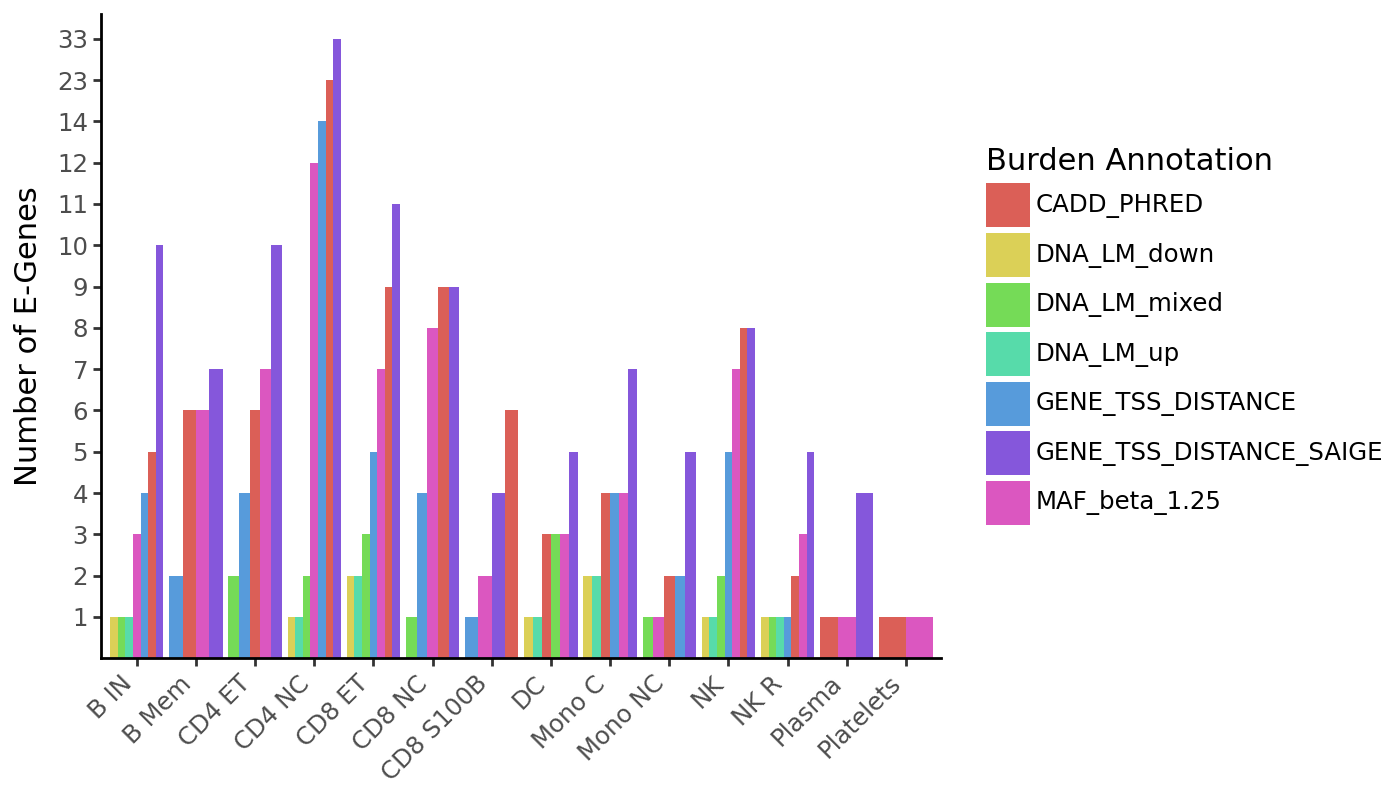

In [22]:
plot_egenes(df_to_plot_6)

[2025-01-28 09:09:36,295] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


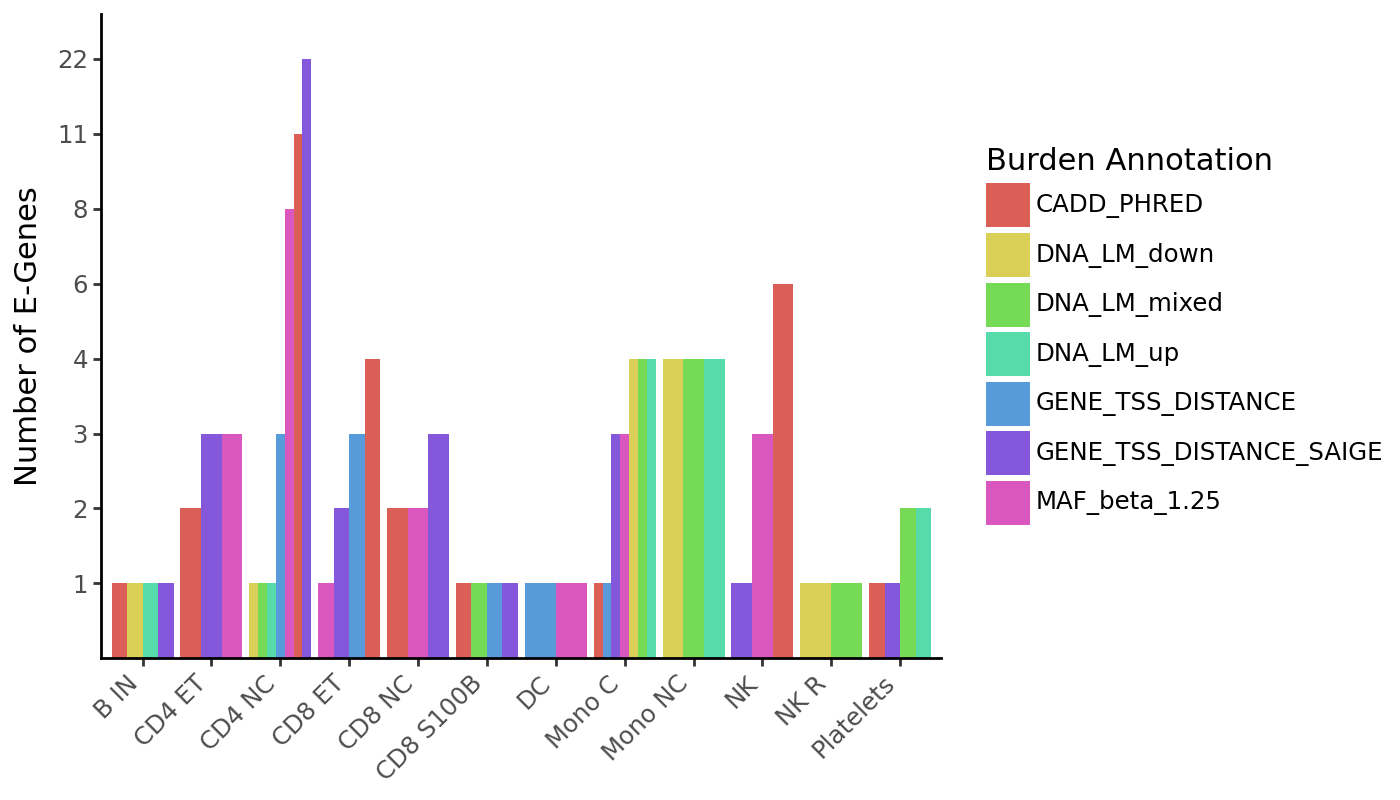

In [23]:
plot_egenes(df_to_plot_7)

[2025-01-28 09:09:36,514] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


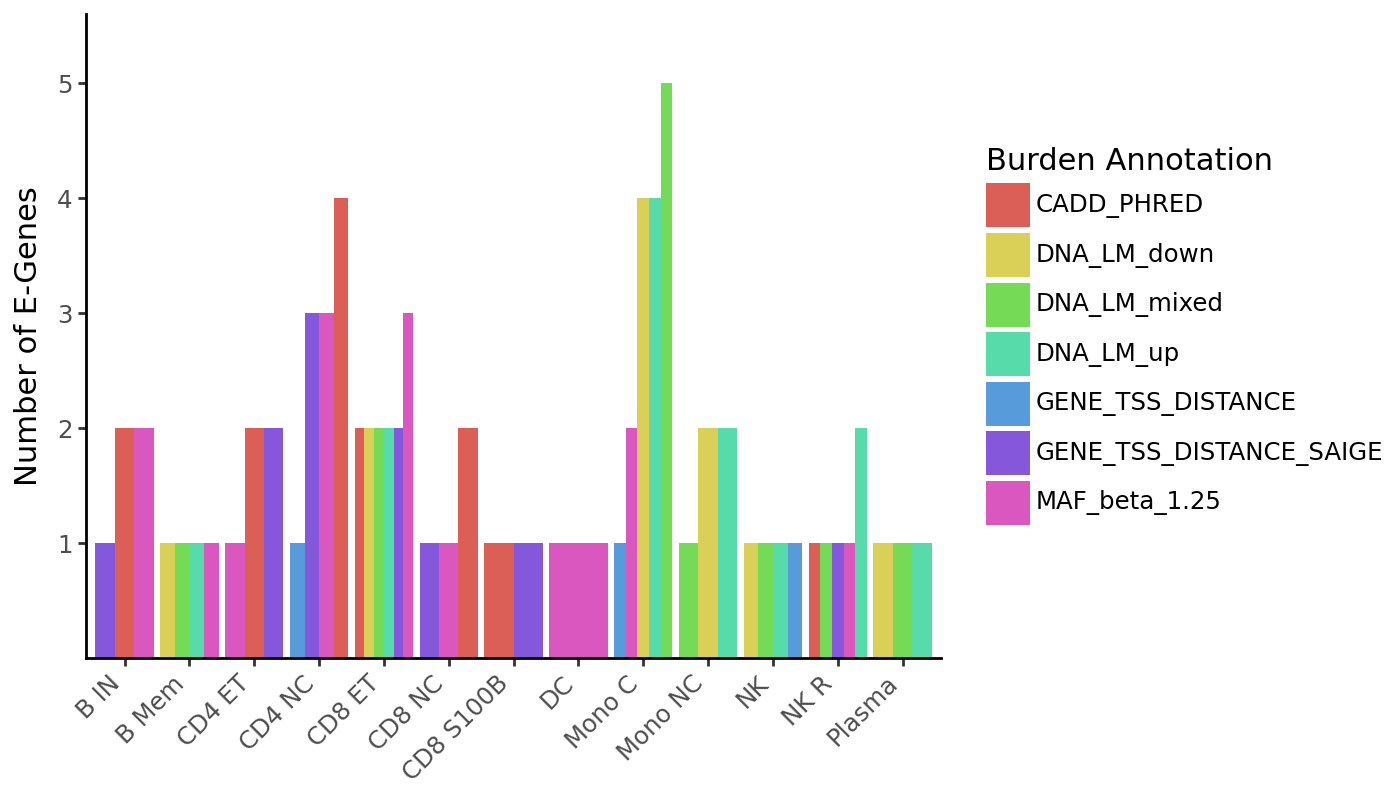

In [24]:
plot_egenes(df_to_plot_8)

[2025-01-28 09:09:36,726] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


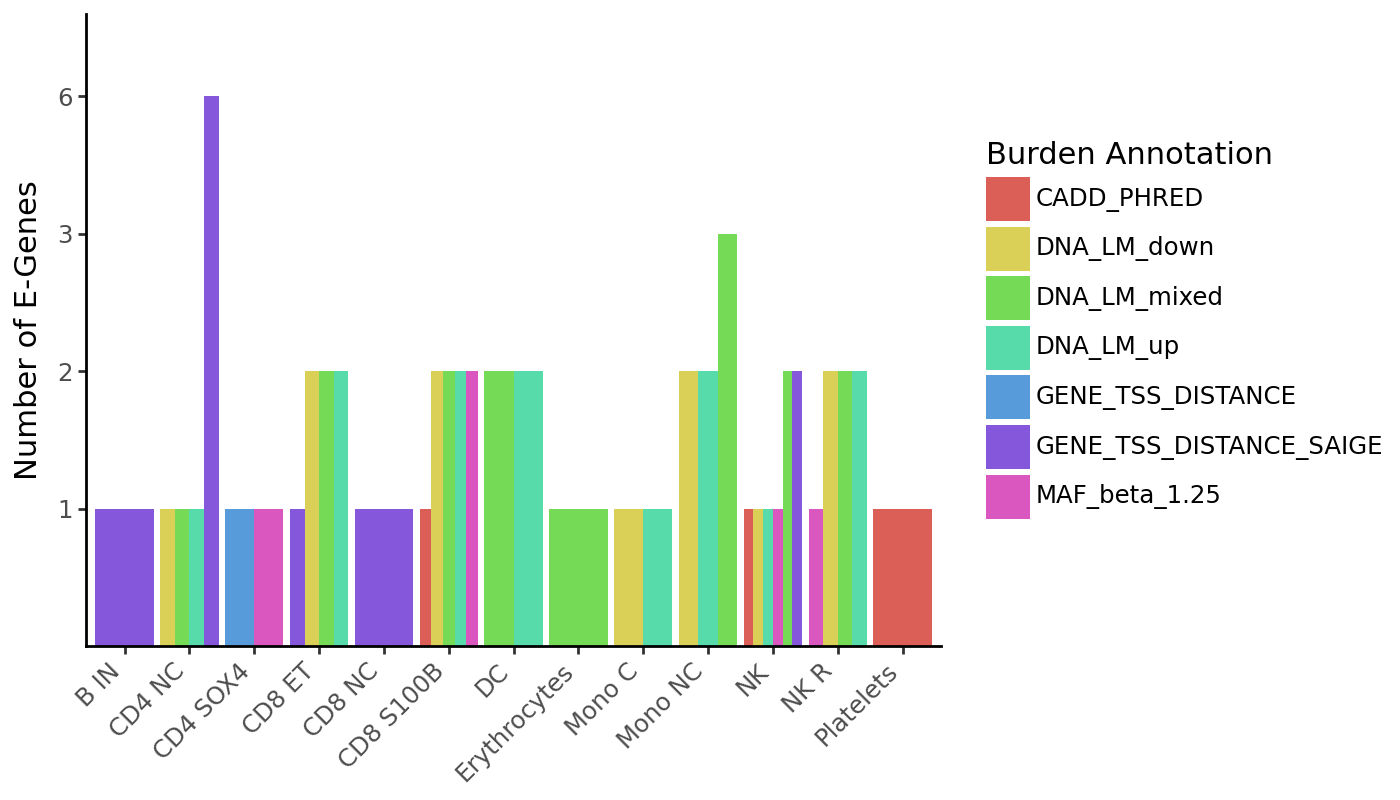

In [25]:
plot_egenes(df_to_plot_9)

[2025-01-28 09:09:36,924] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


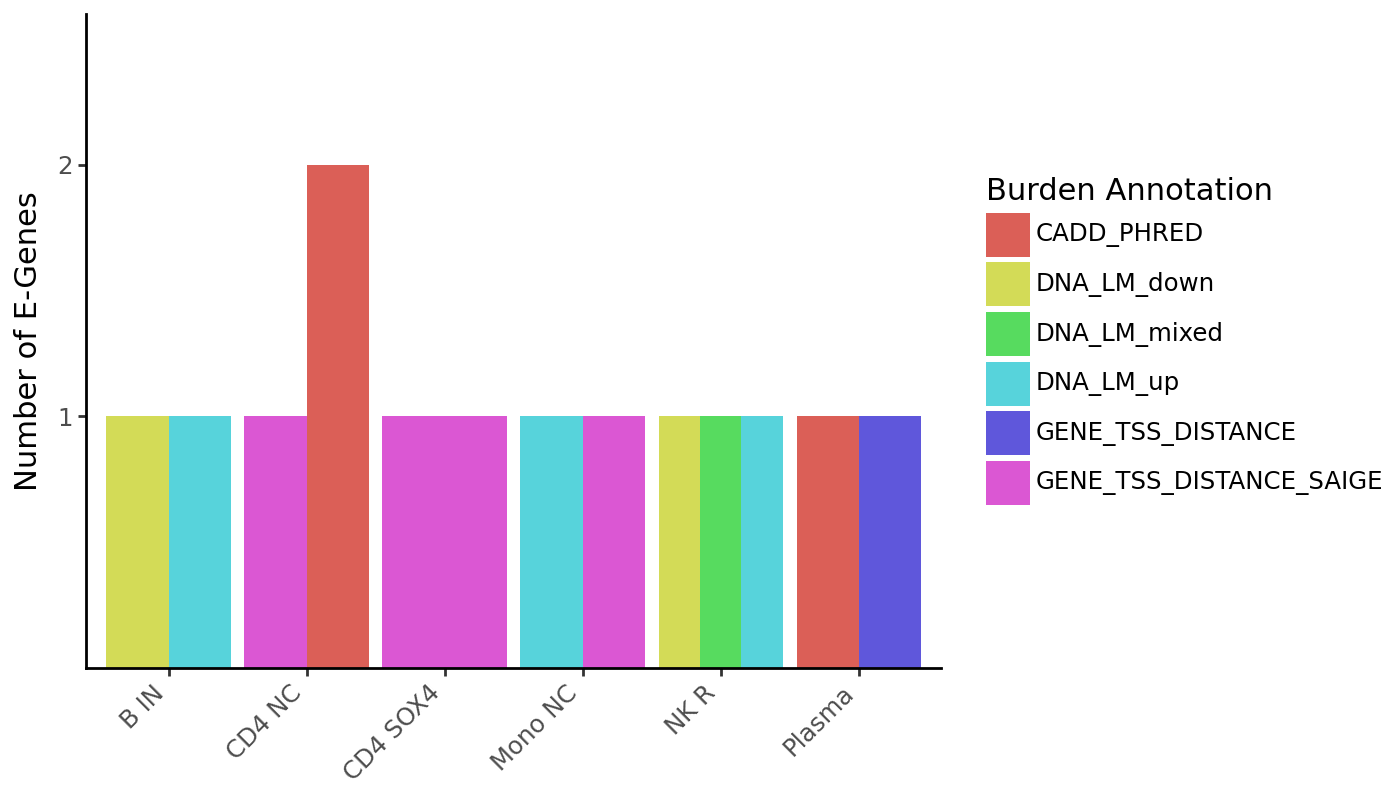

In [26]:
plot_egenes(df_to_plot_10)

[2025-01-28 09:09:37,118] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


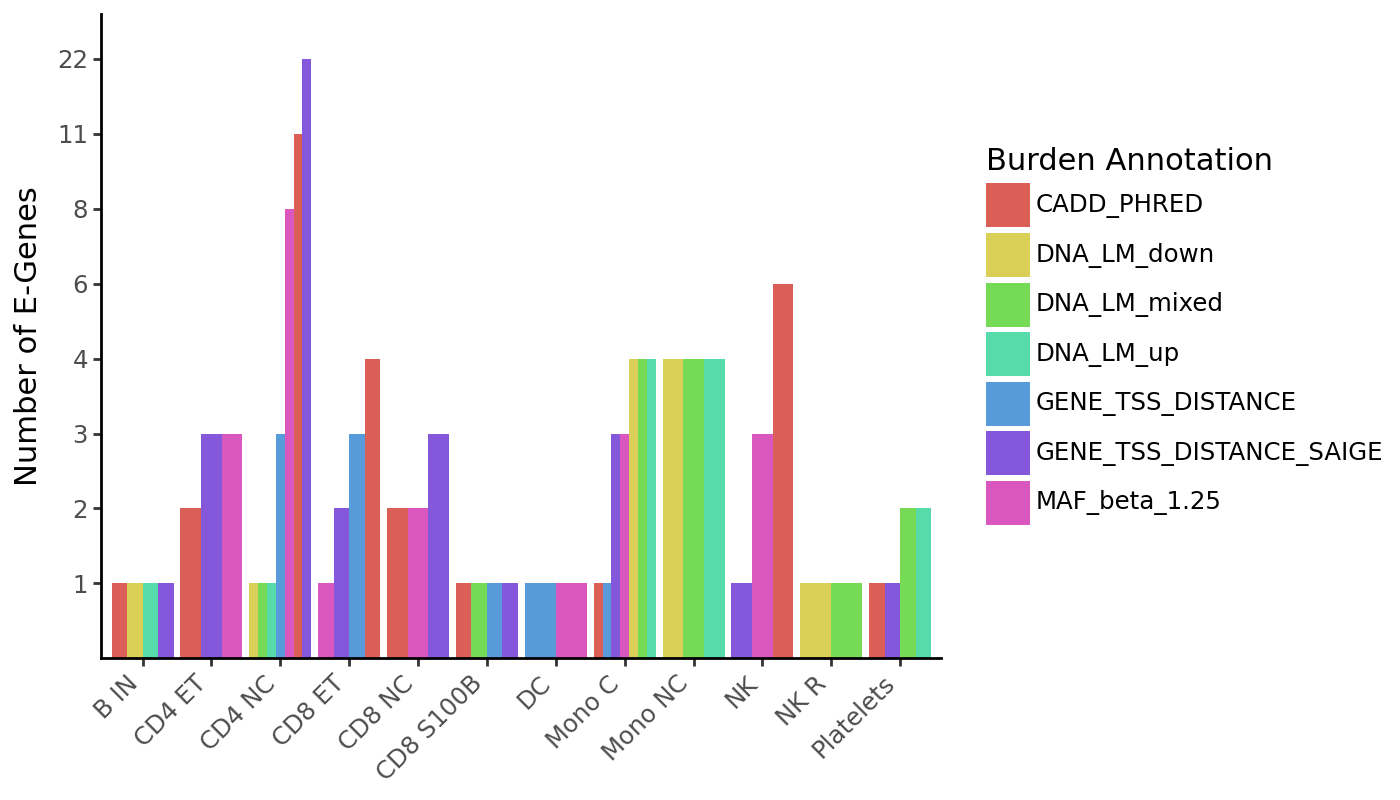

In [27]:
plot_egenes(df_to_plot_7)

[2025-01-28 09:09:37,351] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


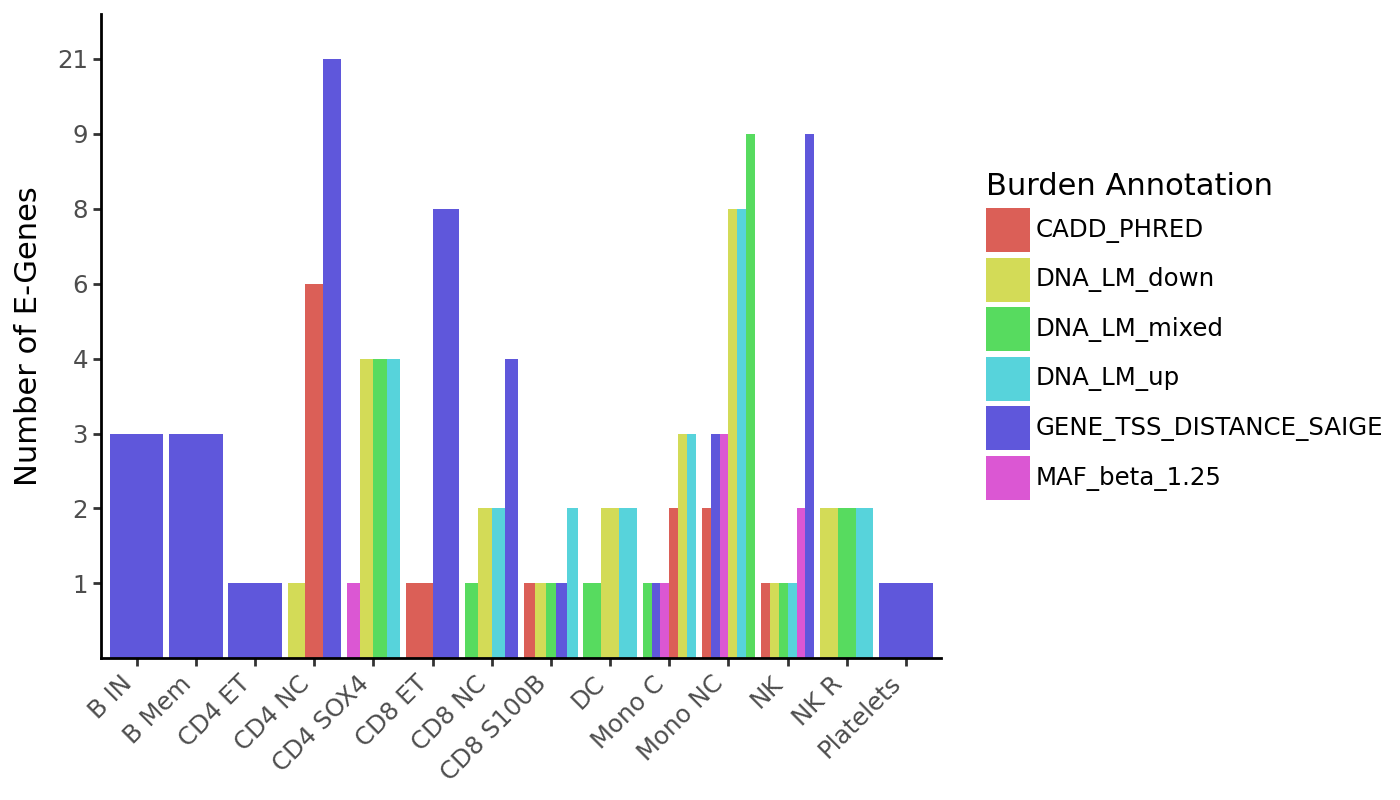

In [28]:
plot_egenes(df_to_plot_11)

[2025-01-28 09:09:37,569] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


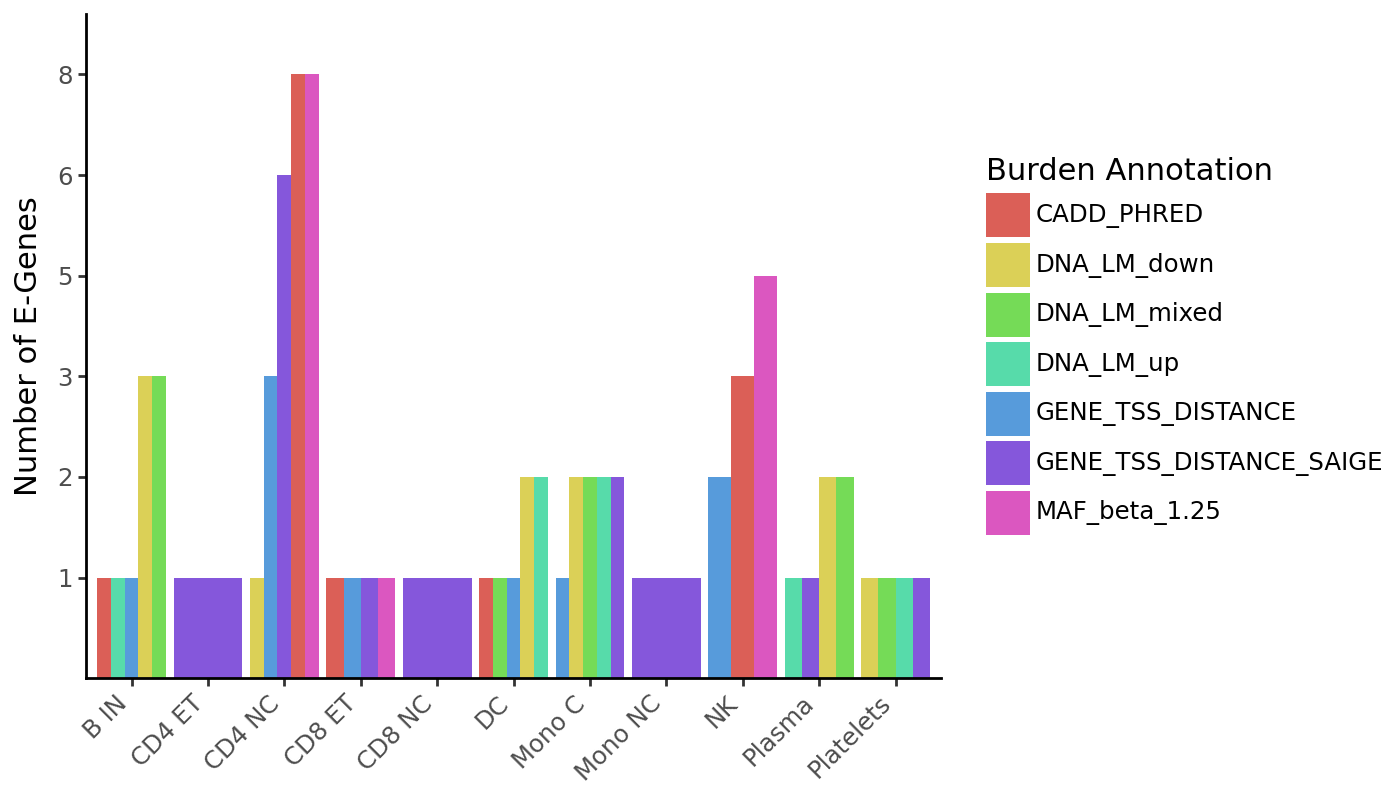

In [29]:
plot_egenes(df_to_plot_12)

[2025-01-28 09:09:37,777] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


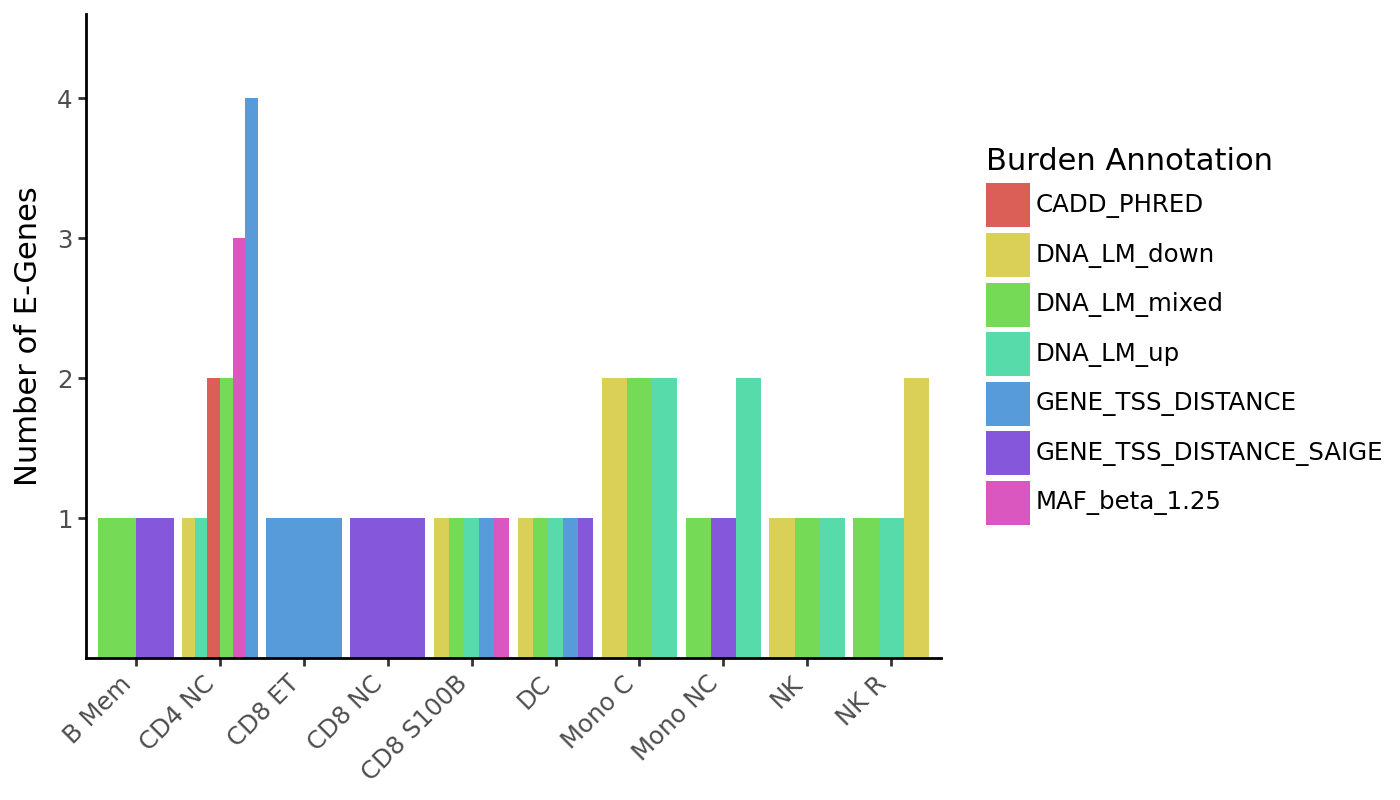

In [30]:
plot_egenes(df_to_plot_13)

## Heatmap for egene ecpression


In [54]:
def prepare_df(df, chromosome):
    df = df.copy()  
    df['chromosome'] = chromosome  
    return df

In [55]:
def create_chromosome_heatmap(df_list):
    """
  
    Parameters:
        df_list: list of pd.DataFrame
         
    
    Returns:
        None
    """
    combined_df = pd.concat(df_list, ignore_index=True)

    heatmap_data = combined_df.pivot_table(
        index='chromosome', 
        columns='annotation', 
        values='n', 
        aggfunc='sum', 
        fill_value=0 
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data, 
        annot=True,  
        fmt="d",  
        cmap="Blues",  
        cbar_kws={'label': 'Number of E-Genes'}  
    )
    plt.title("Heatmap of E-Genes per Annotation and Chromosome")
    plt.xlabel("Burden Annotation")
    plt.ylabel("Chromosome")
    plt.tight_layout()
    plt.show()

In [60]:
df_6 = prepare_df(df_to_plot_6, chromosome = 6)
df_7 = prepare_df(df_to_plot_7, chromosome = 7)
df_8 = prepare_df(df_to_plot_8, chromosome = 8)
df_9 = prepare_df(df_to_plot_9, chromosome = 9)
df_10 = prepare_df(df_to_plot_10, chromosome = 10)
df_11 = prepare_df(df_to_plot_11, chromosome = 11)
df_12 = prepare_df(df_to_plot_12, chromosome = 12)
df_13 = prepare_df(df_to_plot_13, chromosome = 13)
df_list = [df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13]

/scratch/tmp/l_pock/ipykernel_865875/2643013643.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


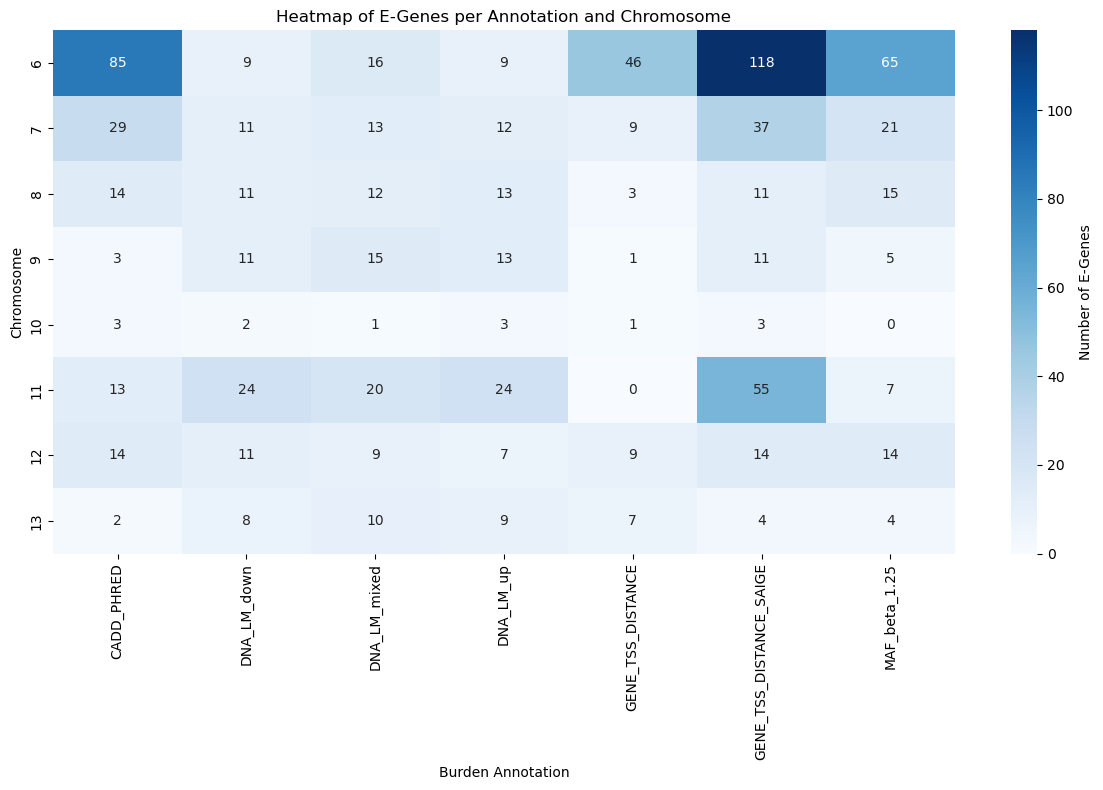

In [61]:
create_chromosome_heatmap(df_list)

## boxplots

In [228]:
def plot_beta(df, burdentype):
    print(burdentype)
    plot = (
        ggplot(df, aes(x='cell_type', y='beta'))
        + geom_boxplot()
        + labs(title=f'beta values {burdentype}',
               x='celltype',
               y='beta values')
        + theme(axis_text_x=element_text(rotation=45, hjust=1))
    )
    print(plot)


In [229]:
unique_burden_types = df_final_ET['burden_type'].unique()

In [230]:
unique_burden_types

array(['CADD_PHRED', 'DNA_LM_up', 'DNA_LM_down', 'MAF_beta_1.25',
       'DNA_LM_mixed', 'GENE_TSS_DISTANCE', 'GENE_TSS_DISTANCE_SAIGE'],
      dtype=object)

CADD_PHRED


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


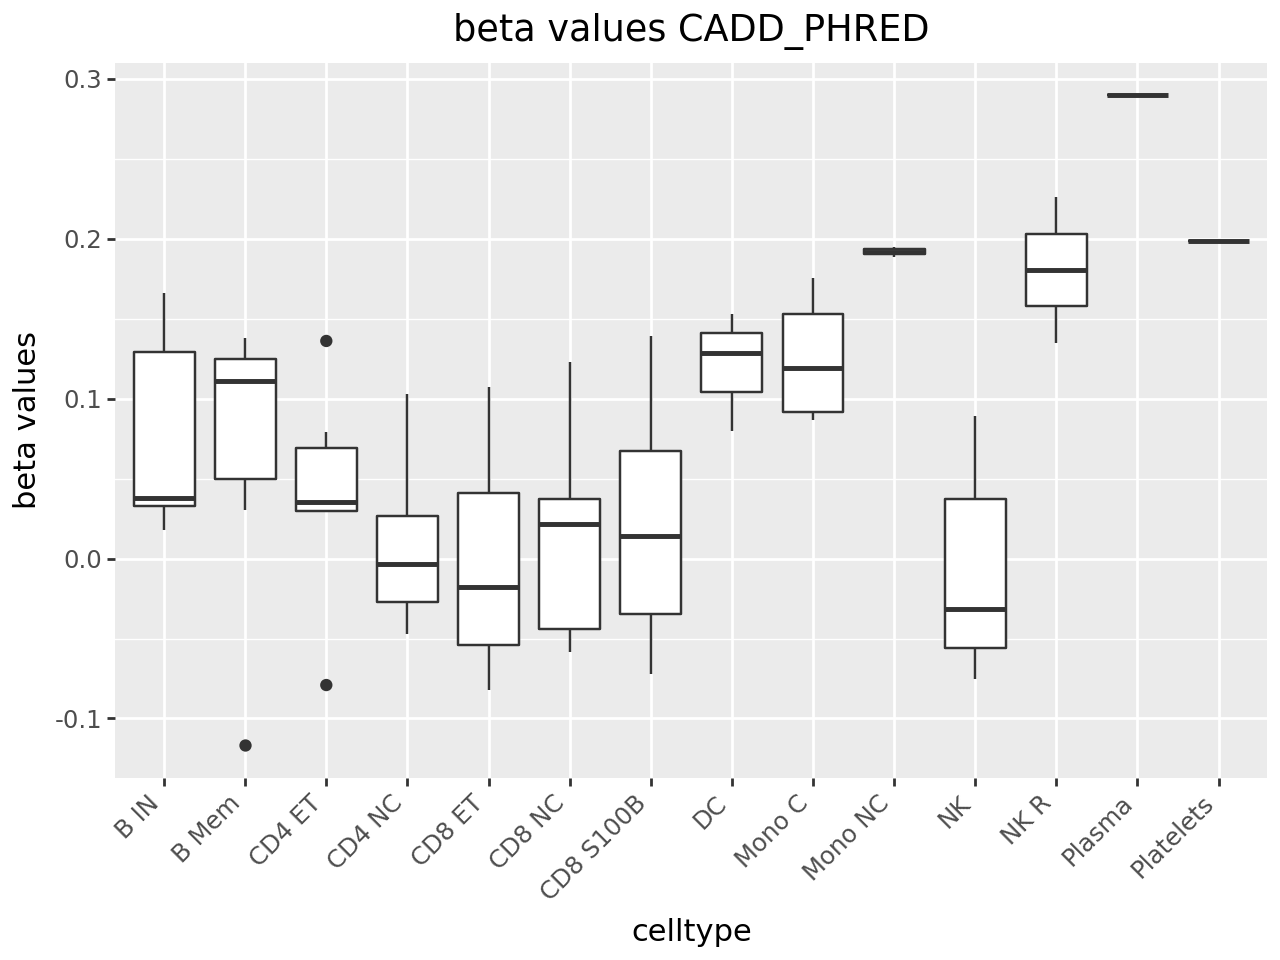


DNA_LM_up


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


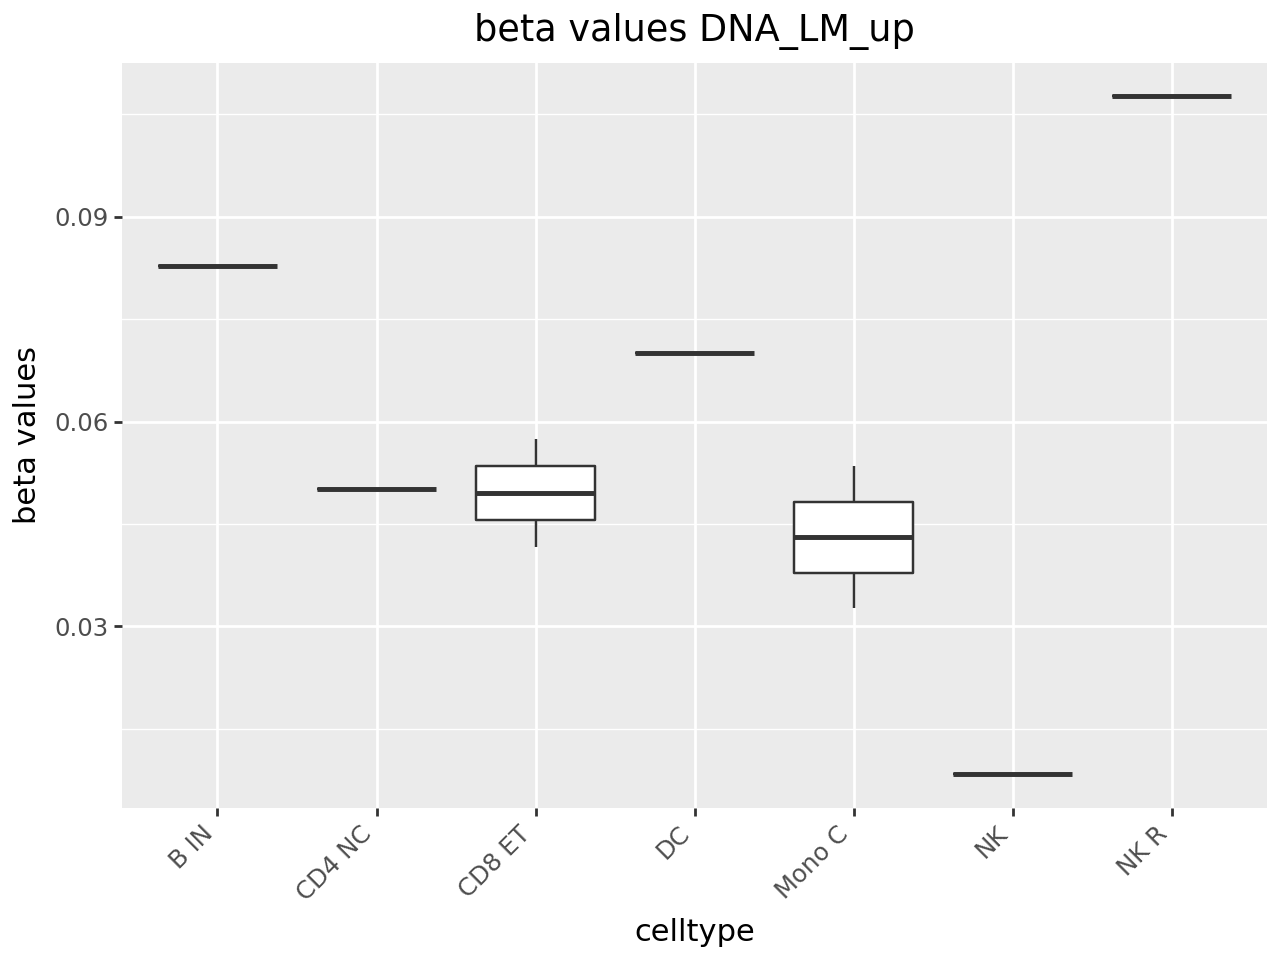


DNA_LM_down


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


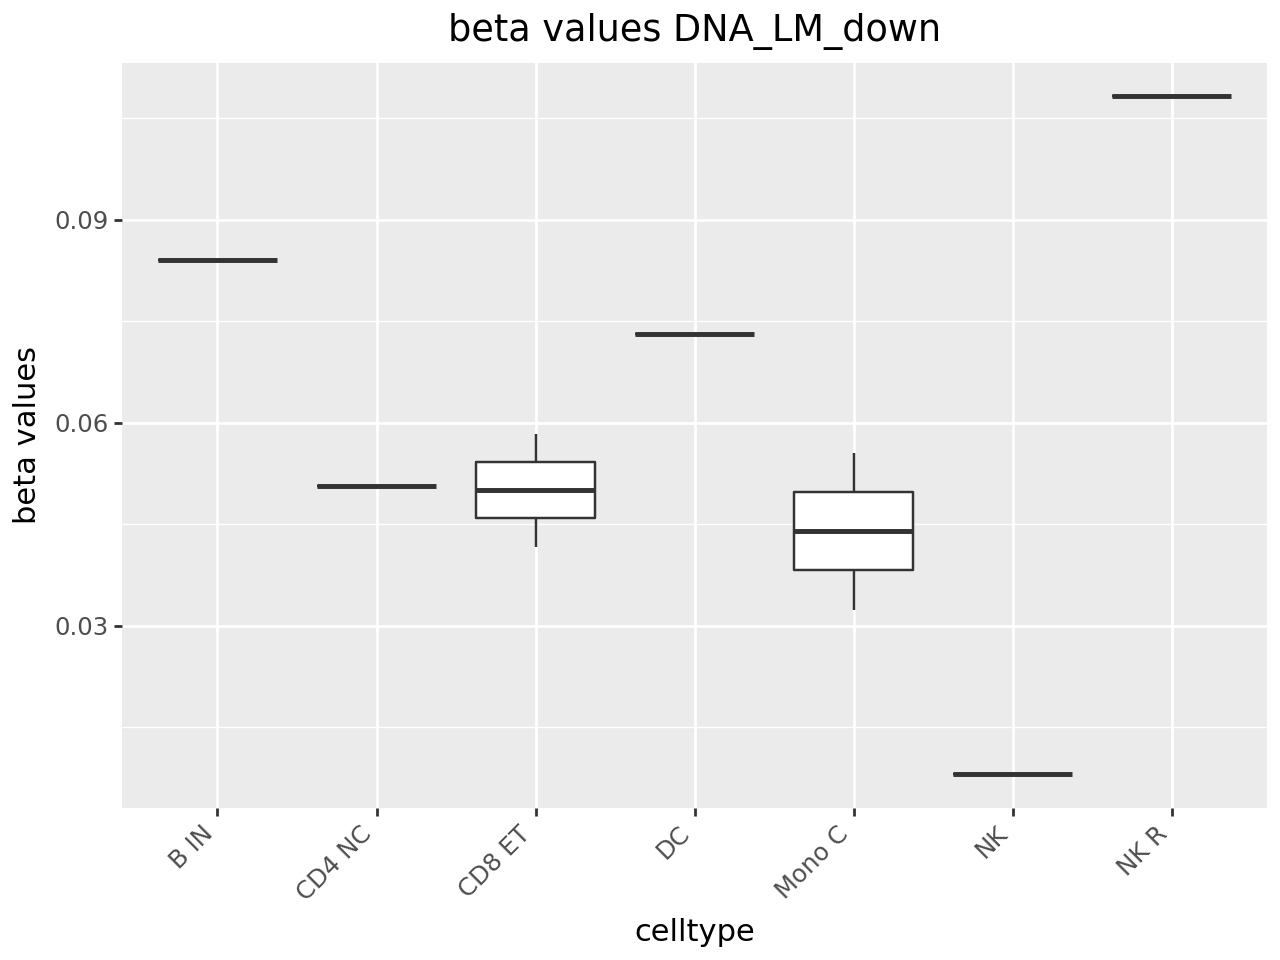


MAF_beta_1.25


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


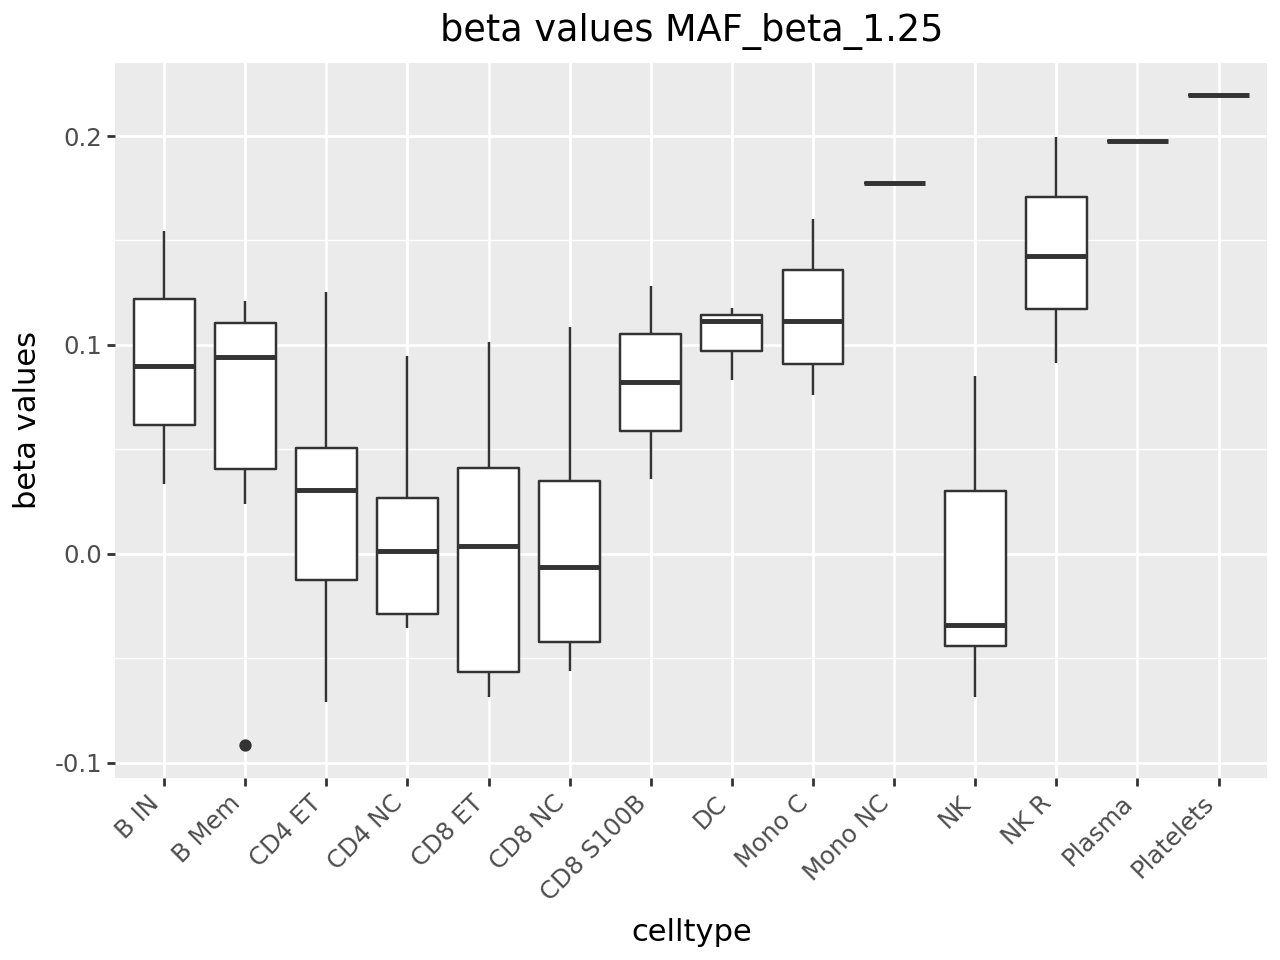


DNA_LM_mixed


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


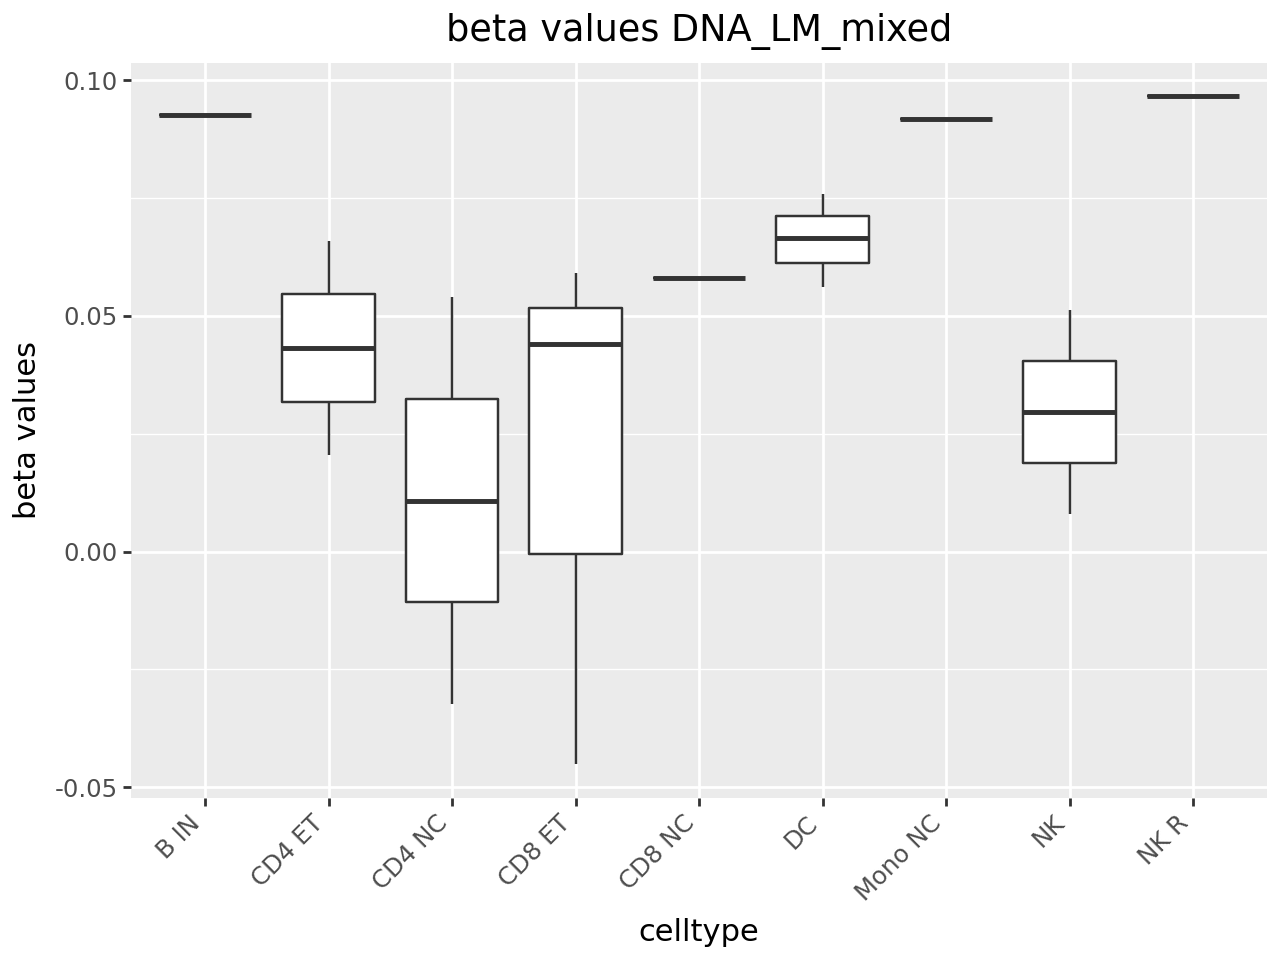


GENE_TSS_DISTANCE


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


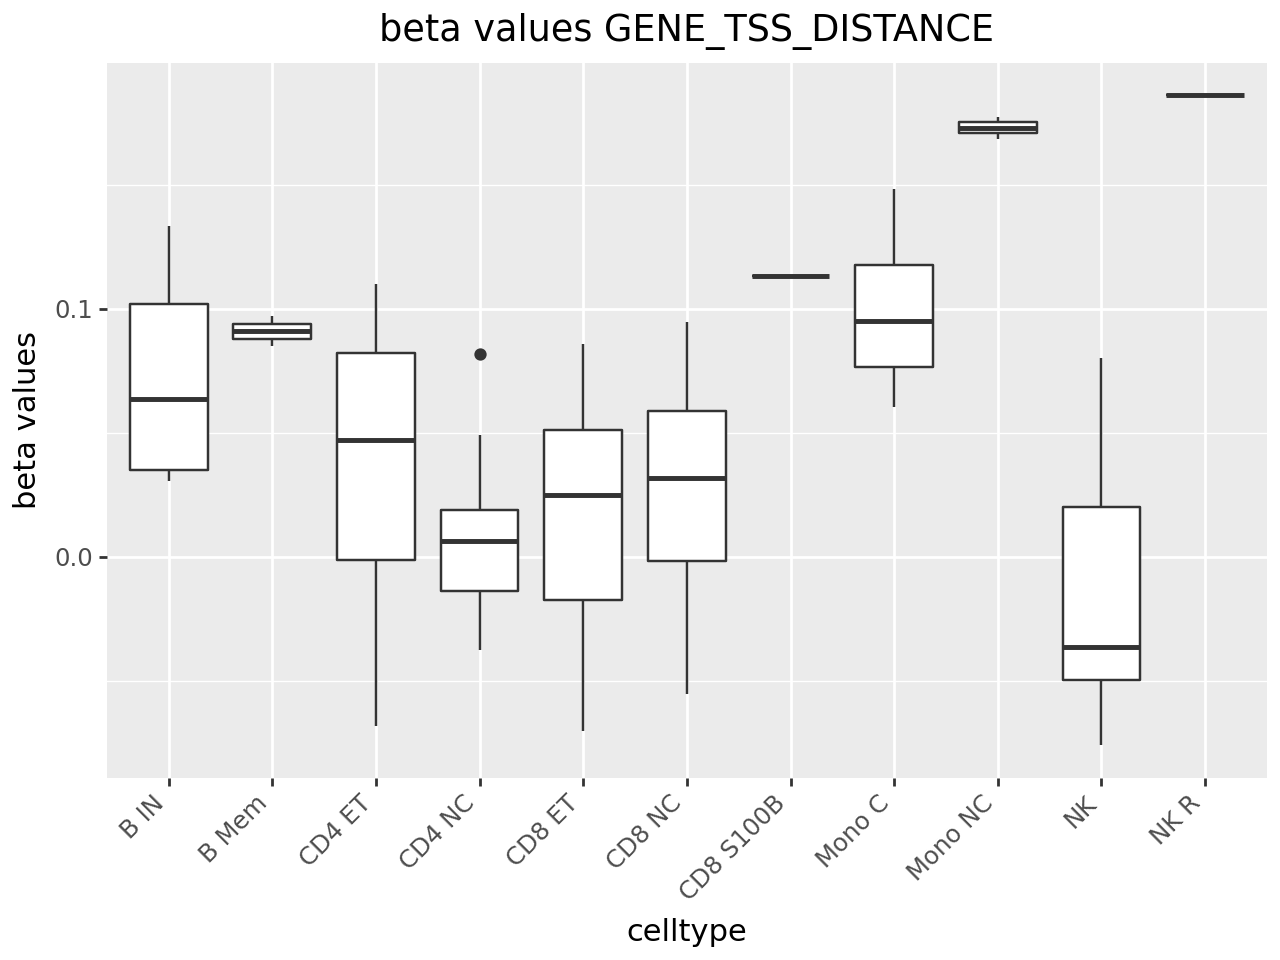


GENE_TSS_DISTANCE_SAIGE


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


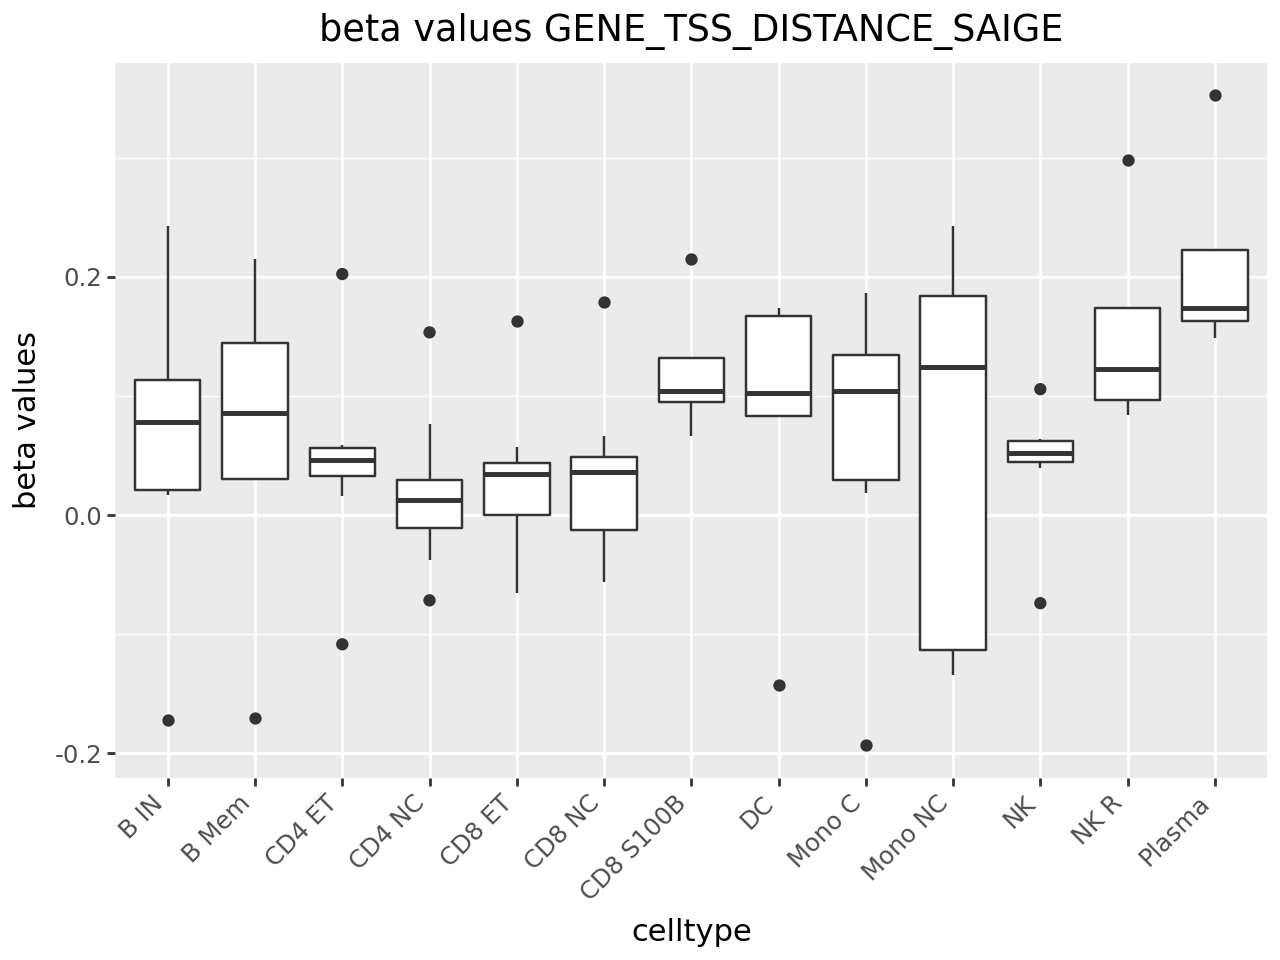

In [231]:
for burdentype in unique_burden_types:
    df_filtered = df_final_ET[(df_final_ET['burden_type'] == burdentype) & (df_final_ET['significant'])]
    plot_beta(df_filtered, burdentype)
    
    

CADD_PHRED


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


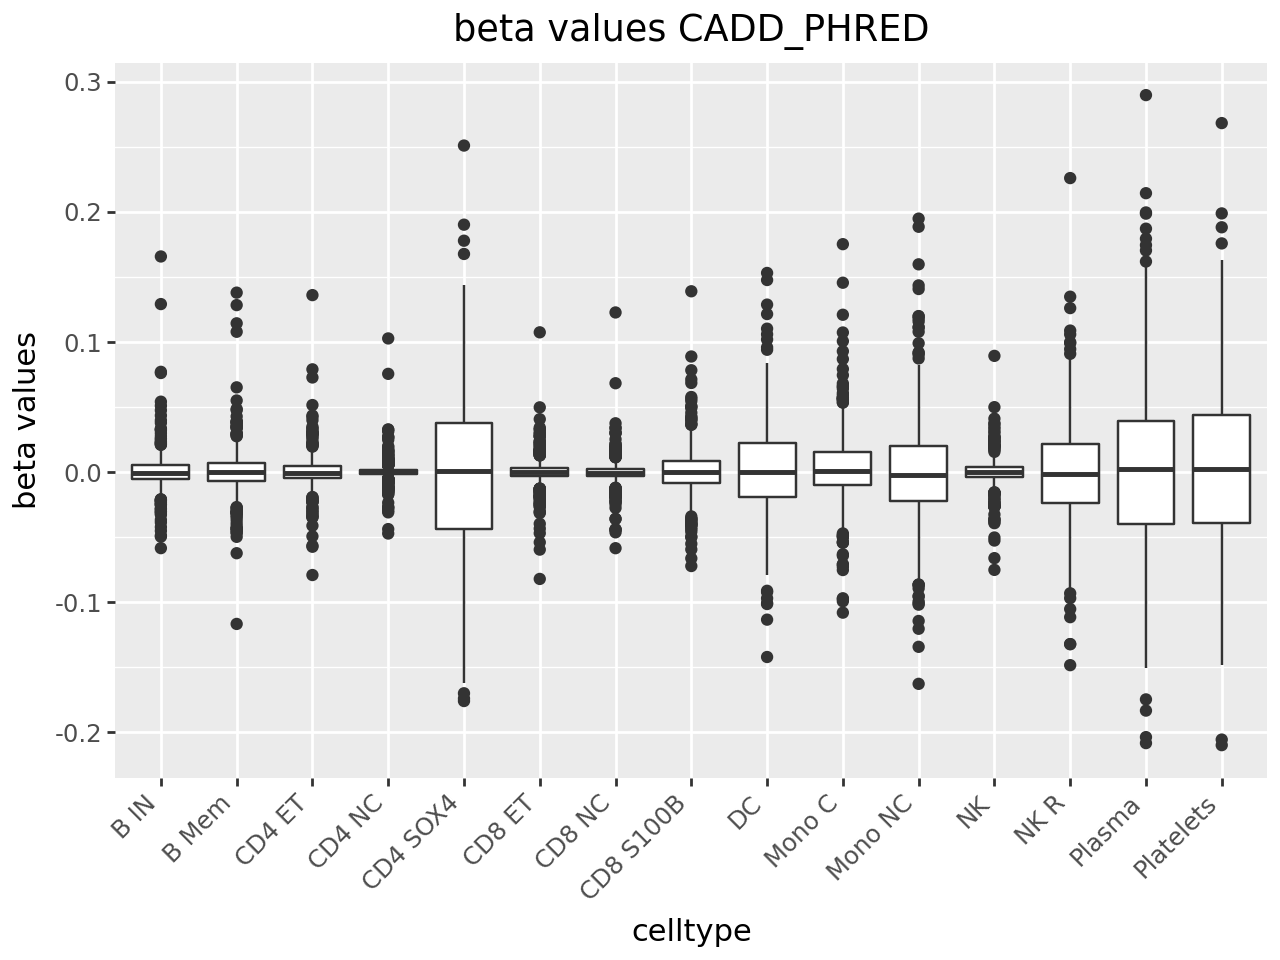


DNA_LM_up


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


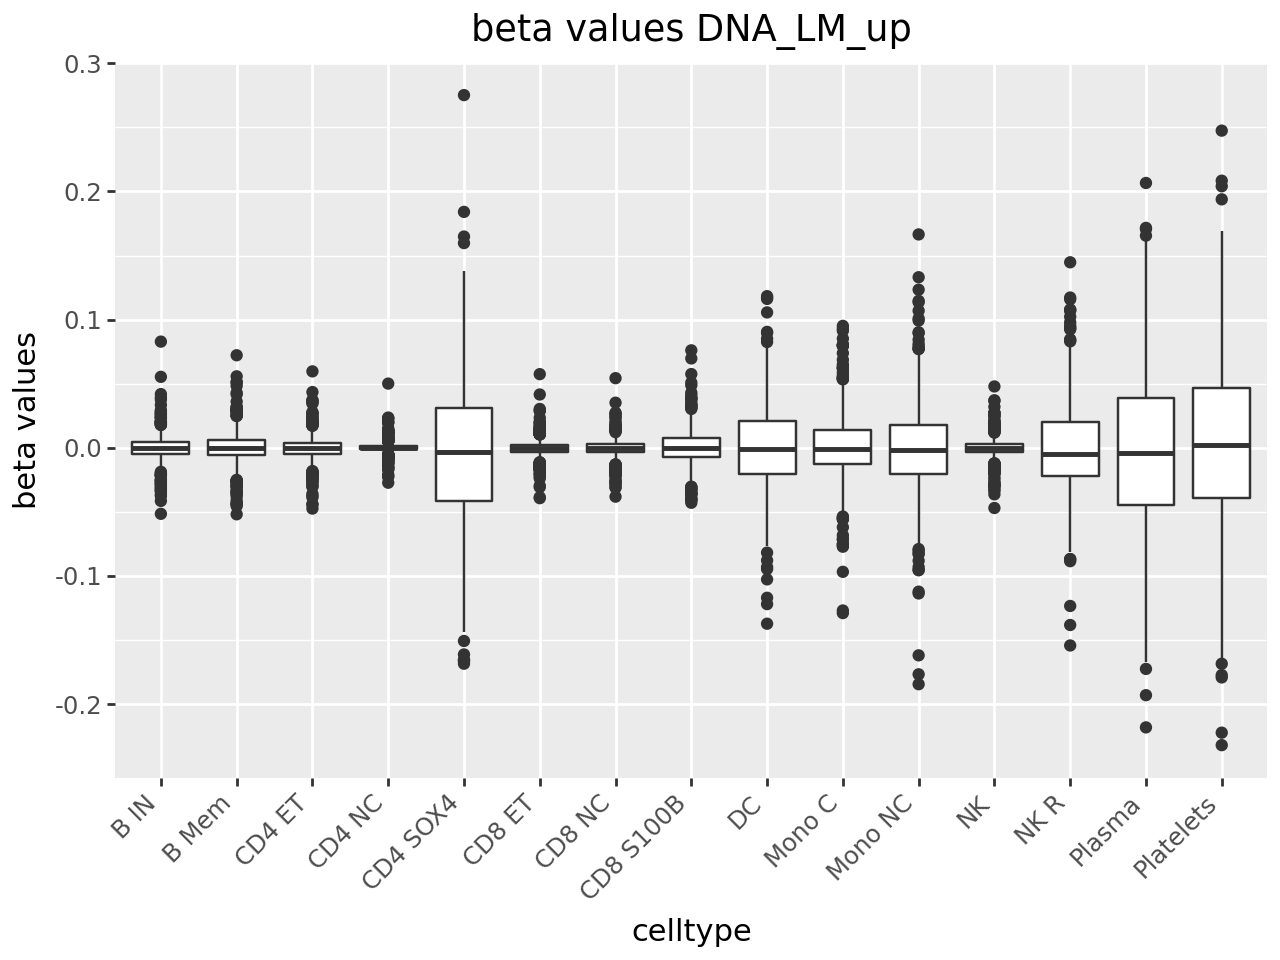


DNA_LM_down


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


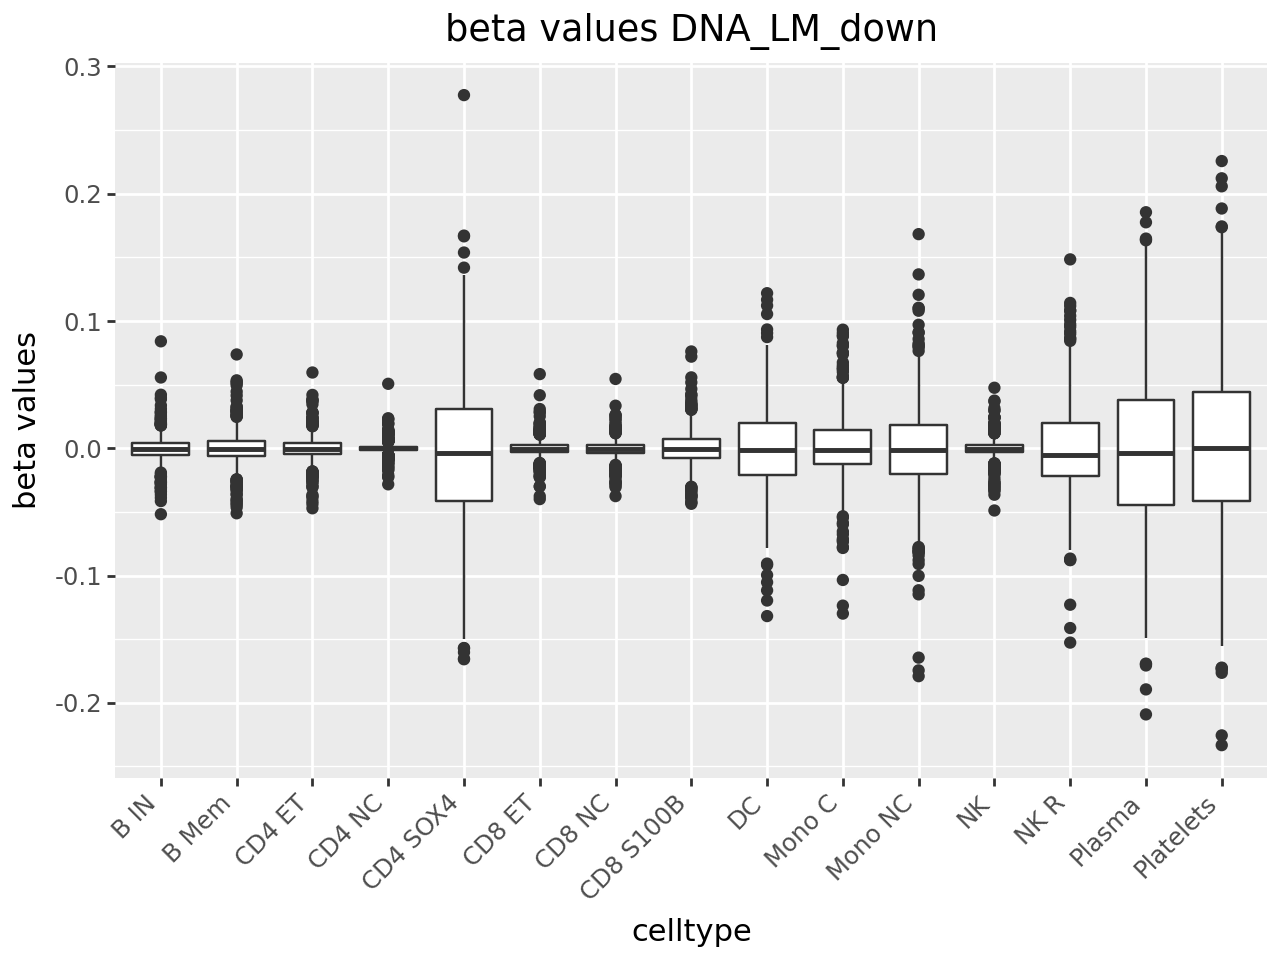


MAF_beta_1.25


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


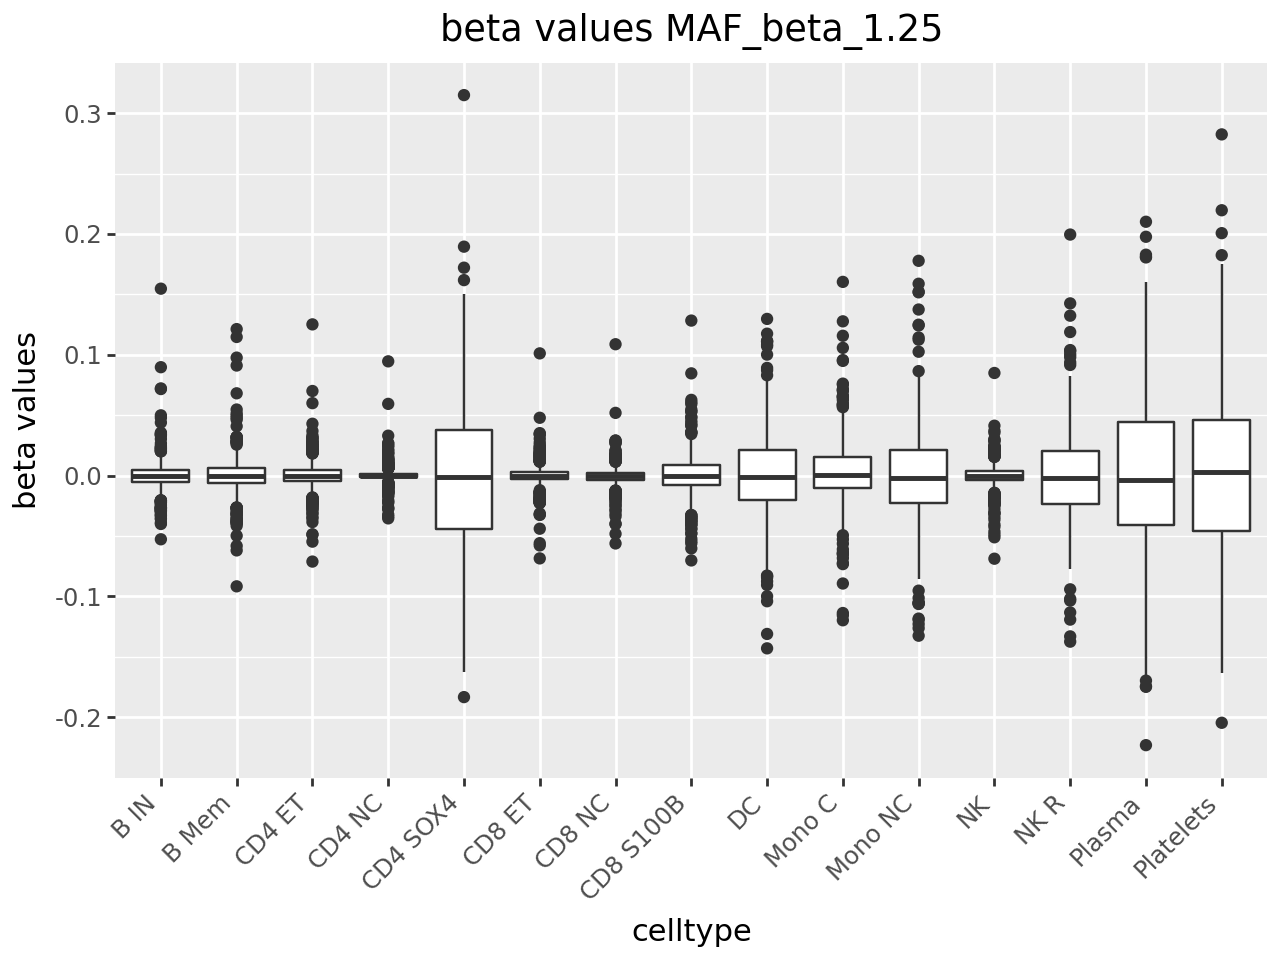


DNA_LM_mixed


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


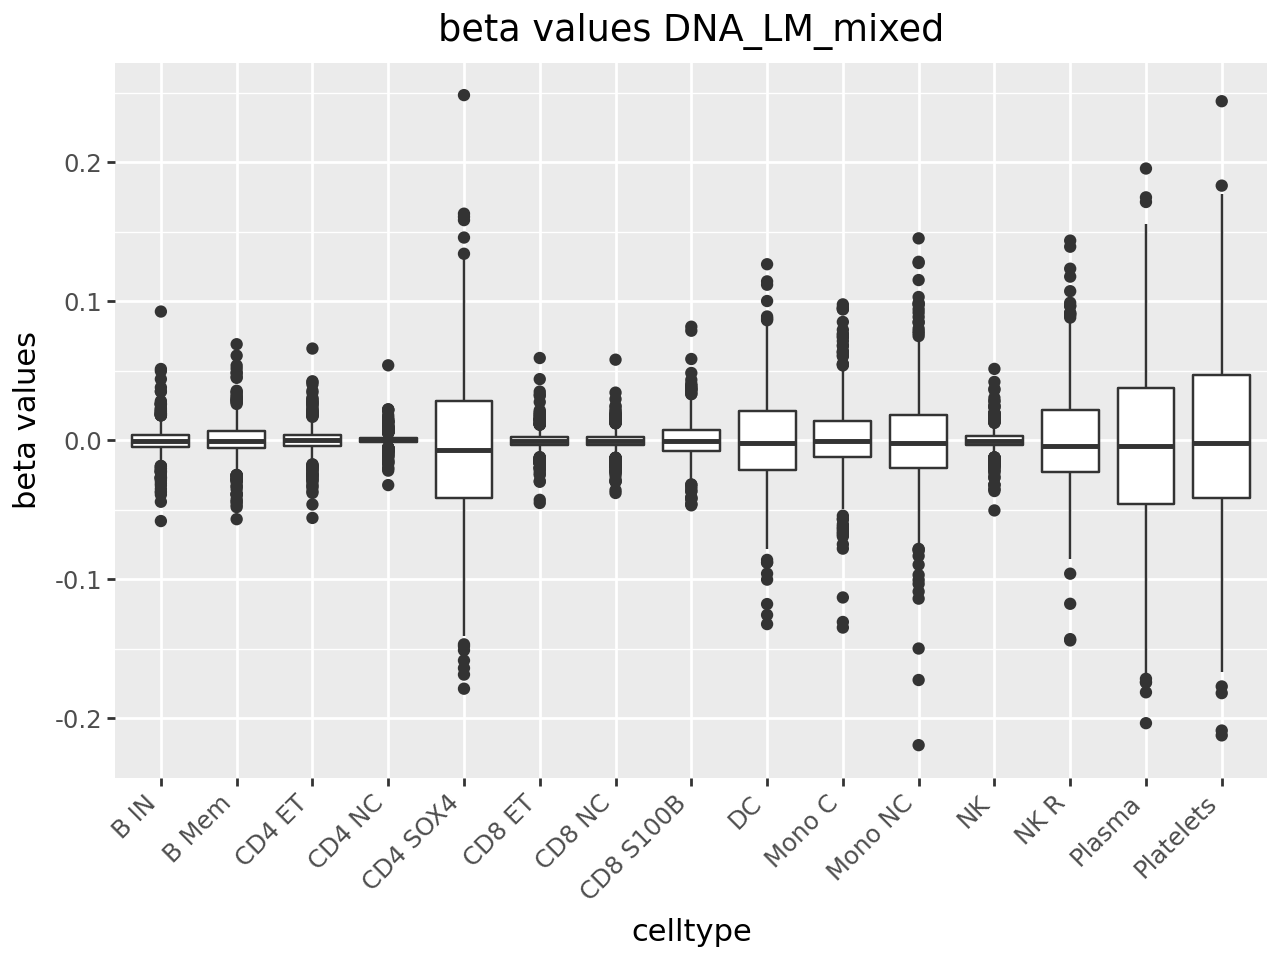


GENE_TSS_DISTANCE


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


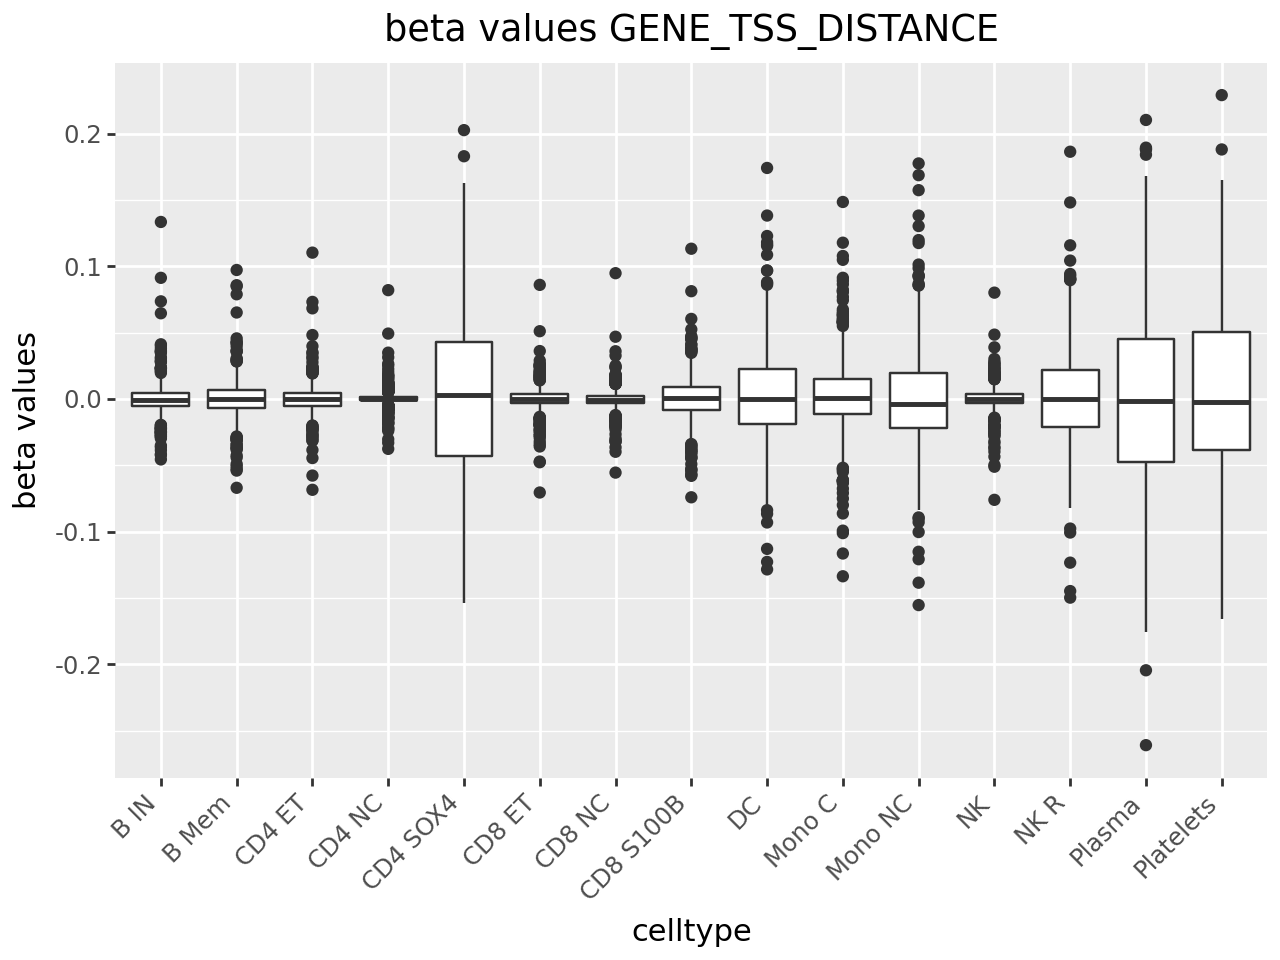


GENE_TSS_DISTANCE_SAIGE


/scratch/tmp/l_pock/ipykernel_609906/1860750527.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


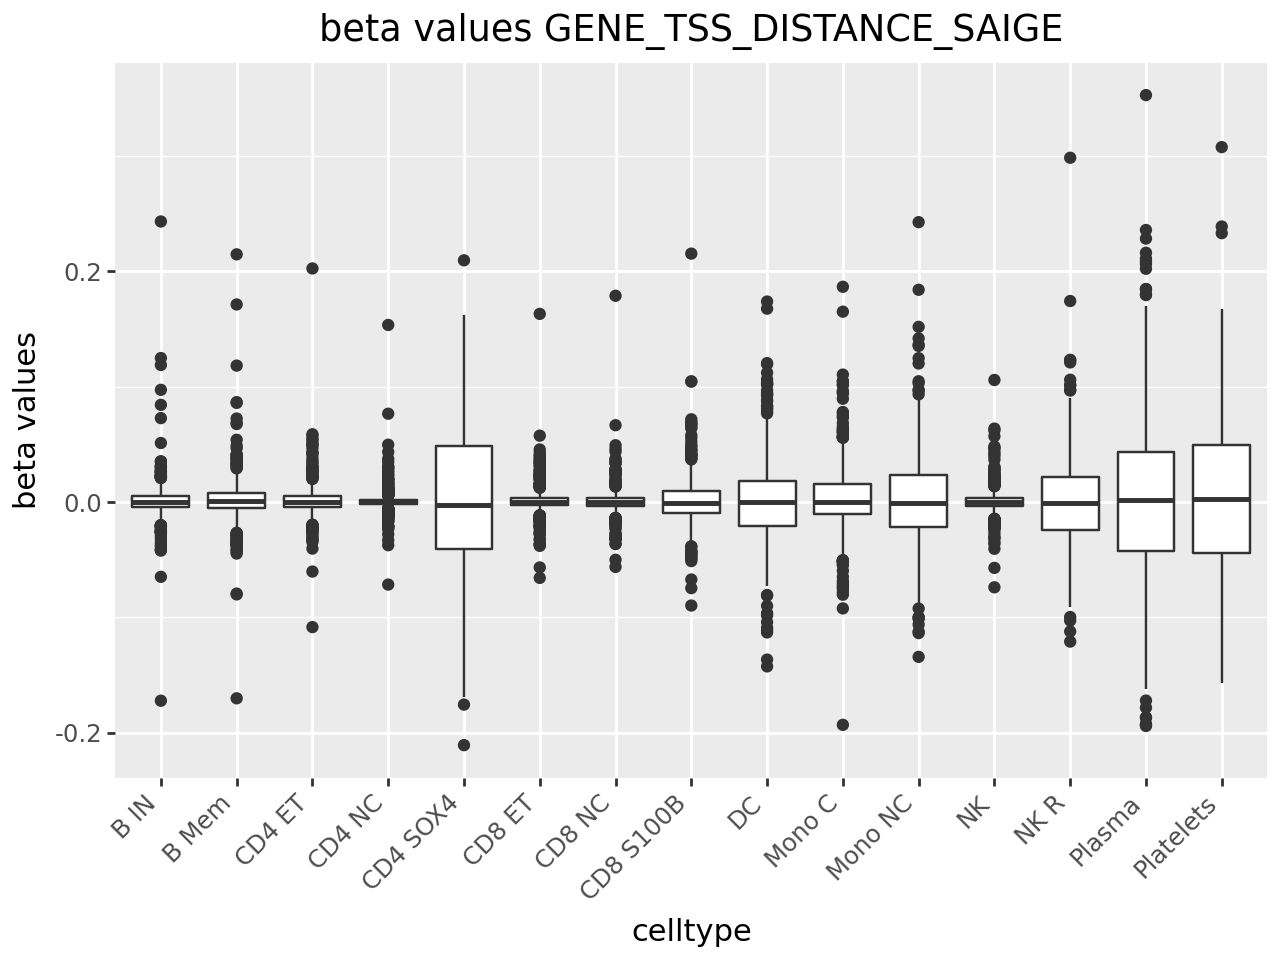

In [232]:
for burdentype in unique_burden_types:
    df_filtered = df_final_ET[(df_final_ET['burden_type'] == burdentype) ]
    plot_beta(df_filtered, burdentype)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
df_final_11[df_final_11['significant']]

burden_gene      target_gene              burden_type        pvalue  \
0   ENSG00000172725  ENSG00000172725               CADD_PHRED  4.414067e-09   
6   ENSG00000142102  ENSG00000142102  GENE_TSS_DISTANCE_SAIGE  9.072465e-05   
6   ENSG00000177697  ENSG00000177697  GENE_TSS_DISTANCE_SAIGE  4.193807e-06   
6   ENSG00000070081  ENSG00000070081  GENE_TSS_DISTANCE_SAIGE  4.807959e-08   
6   ENSG00000149806  ENSG00000149806  GENE_TSS_DISTANCE_SAIGE  2.012851e-04   
..              ...              ...                      ...           ...   
3   ENSG00000176973  ENSG00000176973            MAF_beta_1.25  1.303837e-04   
4   ENSG00000110047  ENSG00000110047             DNA_LM_mixed  6.319194e-06   
4   ENSG00000168056  ENSG00000168056             DNA_LM_mixed  5.251154e-07   
4   ENSG00000176973  ENSG00000176973             DNA_LM_mixed  3.524075e-05   
4   ENSG00000168876  ENSG00000168876             DNA_LM_mixed  3.819646e-05   

        beta cell_type chromosome  significant  FDR_corrected  \
0  -0.073422    CD8 ET         11         True       0.000003   
6  -0.033441    CD8 ET         11         True       0.009448   
6   0.025979    CD8 ET         11         True       0.001019   
6  -0.070347    CD8 ET         11         True       0.000035   
6  -0.021317    CD8 ET         11         True       0.018342   
..       ...       ...        ...          ...            ...   
3   0.207076  CD4 SOX4         11         True       0.031162   
4   0.278124  CD4 SOX4         11         True       0.000755   
4   0.217566  CD4 SOX4         11         True       0.000126   
4   0.228145  CD4 SOX4         11         True       0.002282   
4   0.250119  CD4 SOX4         11         True       0.002282   

               celltype-annotation  
0                CD8 ET-CADD_PHRED  
6   CD8 ET-GENE_TSS_DISTANCE_SAIGE  
6   CD8 ET-GENE_TSS_DISTANCE_SAIGE  
6   CD8 ET-GENE_TSS_DISTANCE_SAIGE  
6   CD8 ET-GENE_TSS_DISTANCE_SAIGE  
..                             ...  
3           CD4 SOX4-MAF_beta_1.25  
4            CD4 SOX4-DNA_LM_mixed  
4            CD4 SOX4-DNA_LM_mixed  
4            CD4 SOX4-DNA_LM_mixed  
4            CD4 SOX4-DNA_LM_mixed  

[143 rows x 10 columns]

In [95]:
df_final_6[(df_final_6['significant']) & (df_final_6['cell_type'] == "B IN")]


burden_gene      target_gene              burden_type        pvalue  \
0  ENSG00000204632  ENSG00000204632               CADD_PHRED  1.270150e-04   
0  ENSG00000206503  ENSG00000206503               CADD_PHRED  1.154534e-07   
0  ENSG00000204371  ENSG00000204371               CADD_PHRED  1.791802e-04   
0  ENSG00000124614  ENSG00000124614               CADD_PHRED  1.304384e-17   
0  ENSG00000198755  ENSG00000198755               CADD_PHRED  4.551127e-05   
1  ENSG00000124614  ENSG00000124614                DNA_LM_up  2.828110e-05   
2  ENSG00000124614  ENSG00000124614              DNA_LM_down  2.141538e-05   
3  ENSG00000206503  ENSG00000206503            MAF_beta_1.25  2.316008e-04   
3  ENSG00000124614  ENSG00000124614            MAF_beta_1.25  2.112569e-15   
3  ENSG00000198755  ENSG00000198755            MAF_beta_1.25  3.925299e-05   
4  ENSG00000124614  ENSG00000124614             DNA_LM_mixed  2.826496e-06   
5  ENSG00000206503  ENSG00000206503        GENE_TSS_DISTANCE  1.845958e-04   
5  ENSG00000204371  ENSG00000204371        GENE_TSS_DISTANCE  3.255537e-04   
5  ENSG00000124614  ENSG00000124614        GENE_TSS_DISTANCE  9.954644e-12   
5  ENSG00000198755  ENSG00000198755        GENE_TSS_DISTANCE  1.859995e-04   
6  ENSG00000112799  ENSG00000112799  GENE_TSS_DISTANCE_SAIGE  7.620005e-04   
6  ENSG00000172197  ENSG00000172197  GENE_TSS_DISTANCE_SAIGE  1.420313e-05   
6  ENSG00000204632  ENSG00000204632  GENE_TSS_DISTANCE_SAIGE  1.874677e-04   
6  ENSG00000206503  ENSG00000206503  GENE_TSS_DISTANCE_SAIGE  2.963878e-07   
6  ENSG00000234745  ENSG00000234745  GENE_TSS_DISTANCE_SAIGE  7.047238e-05   
6  ENSG00000196126  ENSG00000196126  GENE_TSS_DISTANCE_SAIGE  7.079915e-04   
6  ENSG00000231389  ENSG00000231389  GENE_TSS_DISTANCE_SAIGE  6.438547e-19   
6  ENSG00000223865  ENSG00000223865  GENE_TSS_DISTANCE_SAIGE  2.111953e-09   
6  ENSG00000124614  ENSG00000124614  GENE_TSS_DISTANCE_SAIGE  2.085628e-37   
6  ENSG00000198755  ENSG00000198755  GENE_TSS_DISTANCE_SAIGE  1.430005e-04   

       beta cell_type chromosome  significant  FDR_corrected  \
0  0.017611      B IN          6         True   1.924277e-02   
0  0.129206      B IN          6         True   3.498237e-05   
0  0.037889      B IN          6         True   2.171664e-02   
0  0.165802      B IN          6         True   7.904566e-15   
0  0.033130      B IN          6         True   9.193277e-03   
1  0.082823      B IN          6         True   1.713835e-02   
2  0.084046      B IN          6         True   1.297772e-02   
3  0.089731      B IN          6         True   4.678336e-02   
3  0.154711      B IN          6         True   1.280217e-12   
3  0.033436      B IN          6         True   1.189366e-02   
4  0.092635      B IN          6         True   1.712857e-03   
5  0.091236      B IN          6         True   3.757190e-02   
5  0.036250      B IN          6         True   4.932139e-02   
5  0.133343      B IN          6         True   6.032514e-09   
5  0.030470      B IN          6         True   3.757190e-02   
6  0.084219      B IN          6         True   4.617723e-02   
6  0.018063      B IN          6         True   1.721420e-03   
6  0.017018      B IN          6         True   1.420068e-02   
6  0.124770      B IN          6         True   4.490276e-05   
6  0.097234      B IN          6         True   7.117711e-03   
6  0.072708      B IN          6         True   4.617723e-02   
6 -0.172183      B IN          6         True   1.950880e-16   
6  0.118757      B IN          6         True   4.266146e-07   
6  0.243120      B IN          6         True   1.263891e-34   
6  0.030884      B IN          6         True   1.237975e-02   

            celltype-annotation  
0               B IN-CADD_PHRED  
0               B IN-CADD_PHRED  
0               B IN-CADD_PHRED  
0               B IN-CADD_PHRED  
0               B IN-CADD_PHRED  
1                B IN-DNA_LM_up  
2              B IN-DNA_LM_down  
3            B IN-MAF_beta_1.25  
3      

In [75]:
def grouped_boxplot(df):
    counts = df['cell_type'].value_counts()
    x_labels = [f"{cell_type} (n={counts[cell_type]})" if cell_type in counts else cell_type
                for cell_type in df['cell_type'].unique()]
    
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, x='cell_type', y='beta', hue='burden_type')
     
    plt.title('Distribution of beta values for celltype and burdentype')
    plt.xlabel('celltype')
    plt.ylabel('beta value')
    
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)
    
    
    plt.legend(title='burden type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

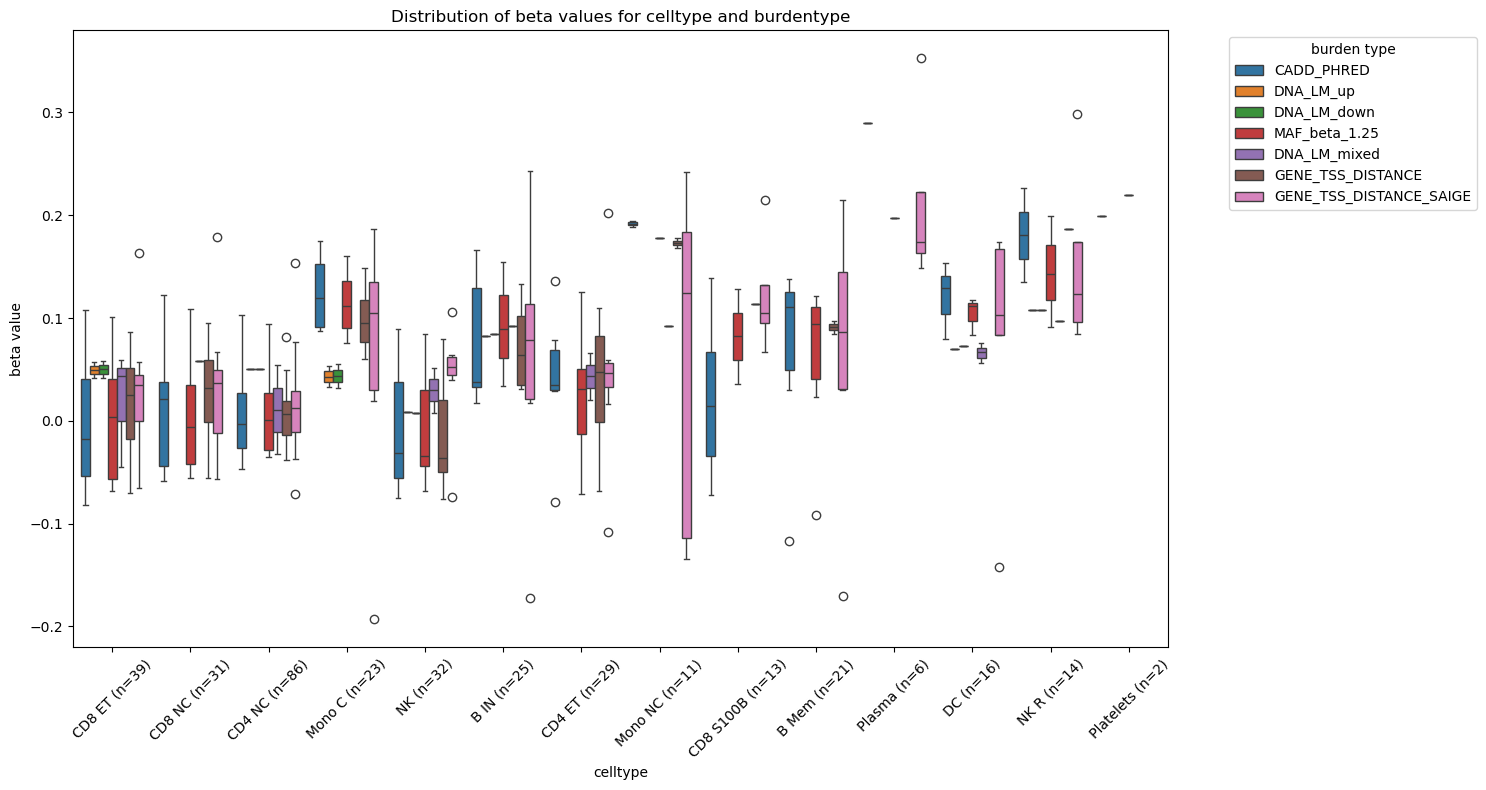

In [98]:
grouped_boxplot(df_final_6[df_final_6['significant']])

In [142]:
def aggregated_variability_heatmap(df):
    # standard deviations
    aggregated_variability = df.groupby(['burden_gene', 'cell_type'])['beta'].std().reset_index()
    aggregated_variability.columns = ['burden_gene', 'cell_type', 'std_beta']
    
    heatmap_data = aggregated_variability.pivot_table(
        index='burden_gene', 
        columns='cell_type', 
        values='std_beta', 
        fill_value=np.nan
    )
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="Blues", 
        cbar_kws={'label': 'Aggregated Beta Variability'}
    )
    plt.title("Heatmap of Beta Variability Across Burden-Types")
    plt.xlabel("Celltype Annotation")
    plt.ylabel("Gene")
    plt.tight_layout()
    plt.show()

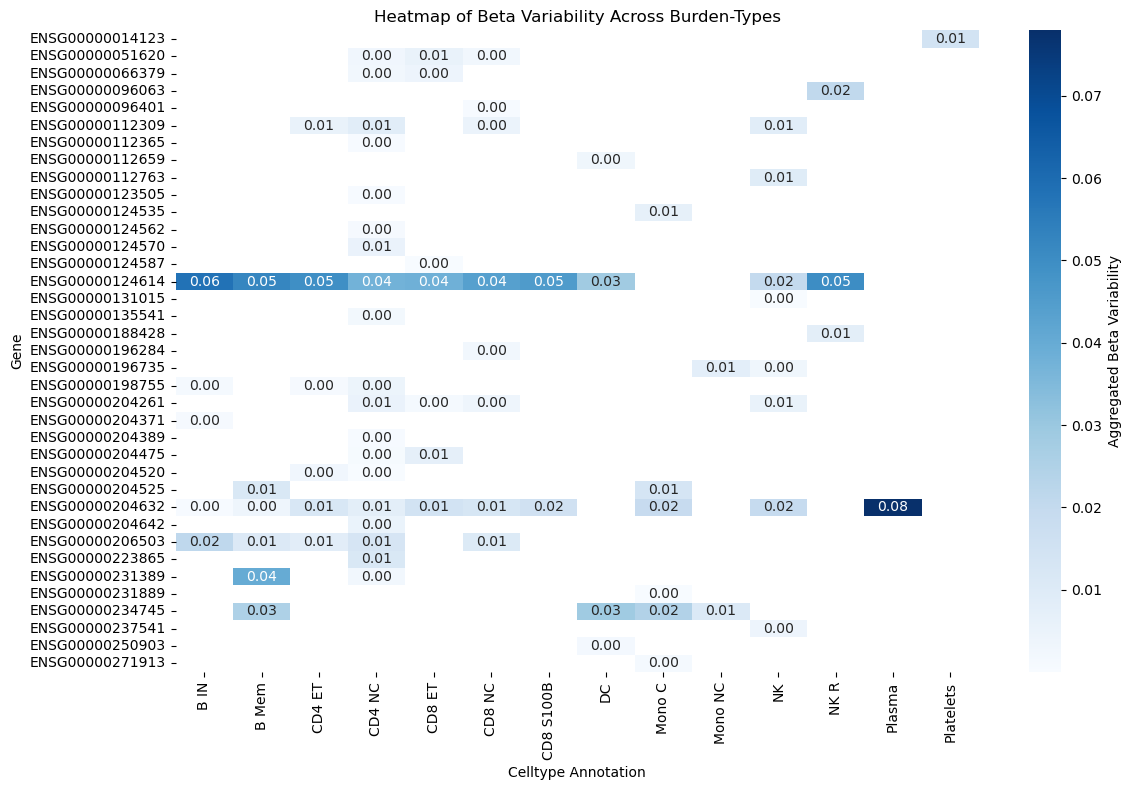

In [143]:
aggregated_variability_heatmap(df_final_6[df_final_6['significant']])

In [140]:
def sign_agreement_heatmap_with_nan(df):
    def sign_agreement(values):
        return all(x > 0 for x in values) or all(x < 0 for x in values)

    sign_agreement_df = df.groupby(['burden_gene', 'cell_type'])['beta'].apply(sign_agreement).reset_index()
    sign_agreement_df.columns = ['burden_gene', 'cell_type', 'sign_agreement']
    
    heatmap_data = sign_agreement_df.pivot_table(
        index='burden_gene', 
        columns='cell_type', 
        values='sign_agreement', 
        fill_value=np.nan
    )
    

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap="Greens", 
        cbar_kws={'label': 'Sign Agreement (1=Consistent, 0=Inconsistent)'},
        mask=heatmap_data.isnull()  
    )
    plt.title("Sign Agreement Heatmap Across Burden Genes and Cell Types")
    plt.xlabel("Cell type")
    plt.ylabel("Burden Gene")
    plt.tight_layout()
    plt.show()

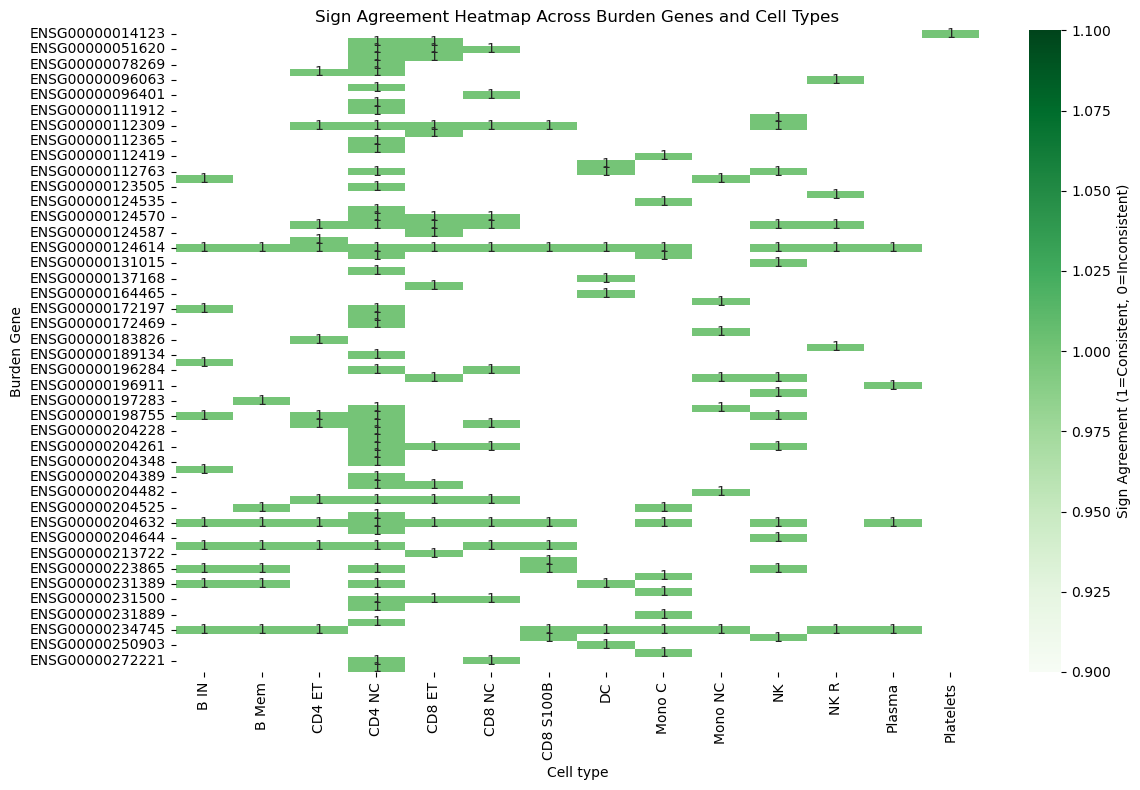

In [141]:
sign_agreement_heatmap_with_nan(df_final_6[df_final_6['significant']])

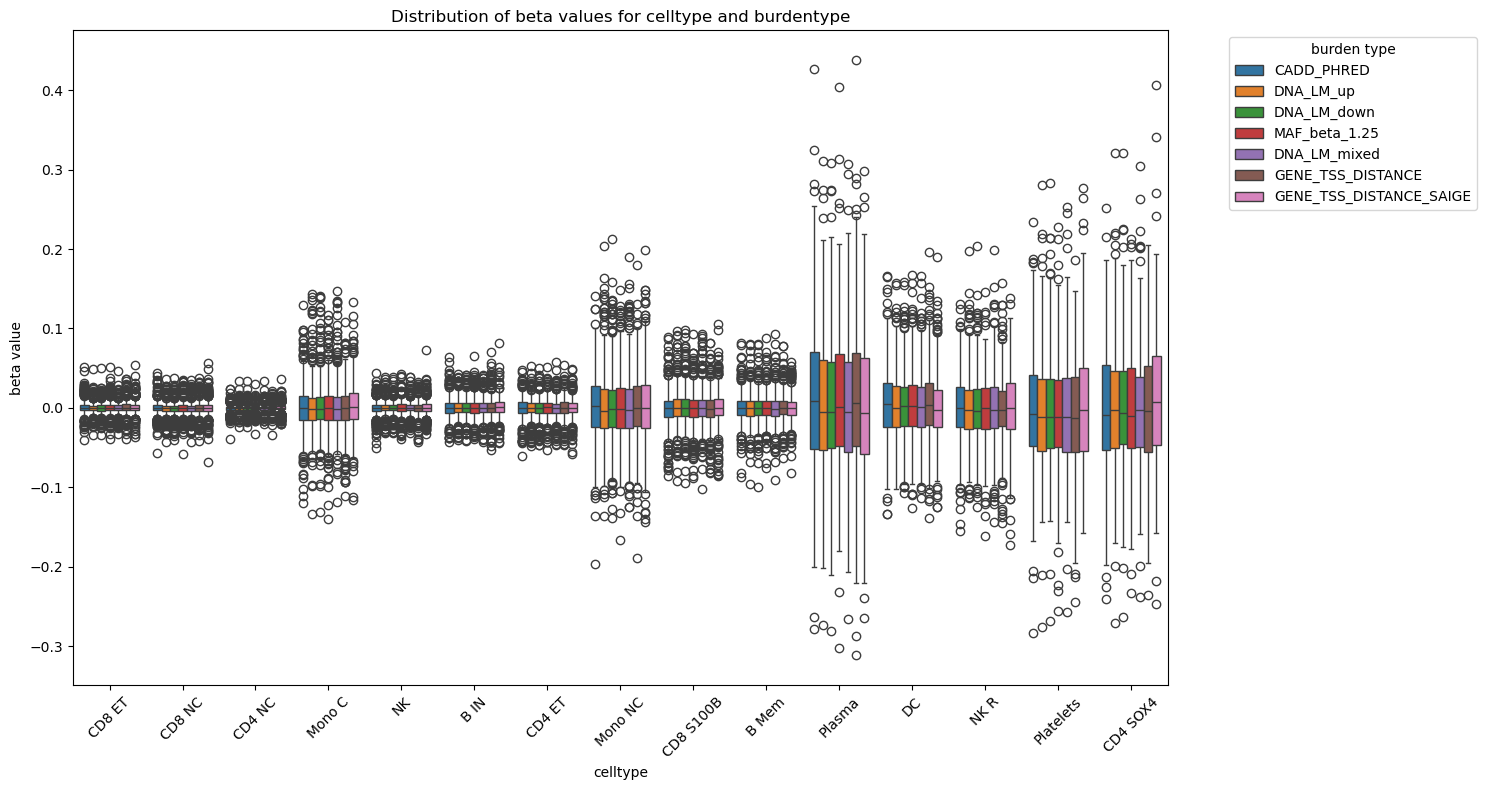

In [47]:
grouped_boxplot(df_final_)

## QQ plots for burden type

In [31]:
def QQ_plot_sig_egenes(FDR_corrected_results, burdentype):
    """
    FDR_corrected_results: pd.DataFrame, output[0] of FDR_correction()
    burdentype: Str

    returns: QQ plot for given burden. Red line: uniform distributed pvalues. 
                                        in red: significant egens
    """
    df = FDR_corrected_results.copy().query("burden_type == @burdentype")

    df = df.sort_values("pvalue")
    df["-log10pval_expected"] = -np.log10(np.arange(1, len(df) + 1) / len(df))
    
    if "-log10pval" not in df.columns:
        df["-log10pval"] = -np.log10(df["pvalue"])
    
    aes_kwargs = dict(x="-log10pval_expected", y="-log10pval")
    plot = (
        ggplot(df, aes(**aes_kwargs, color="significant"))
        + labs(title=f"QQ plot for {burdentype}")
        + scale_color_manual(values = ["black", "red"])
        + theme_classic()
        + geom_abline(intercept=0, slope=1, color="red")
        + geom_point()
        + theme(legend_position="top", figure_size = (4,4))
    )
    return(plot)

[2025-01-28 09:16:55,056] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


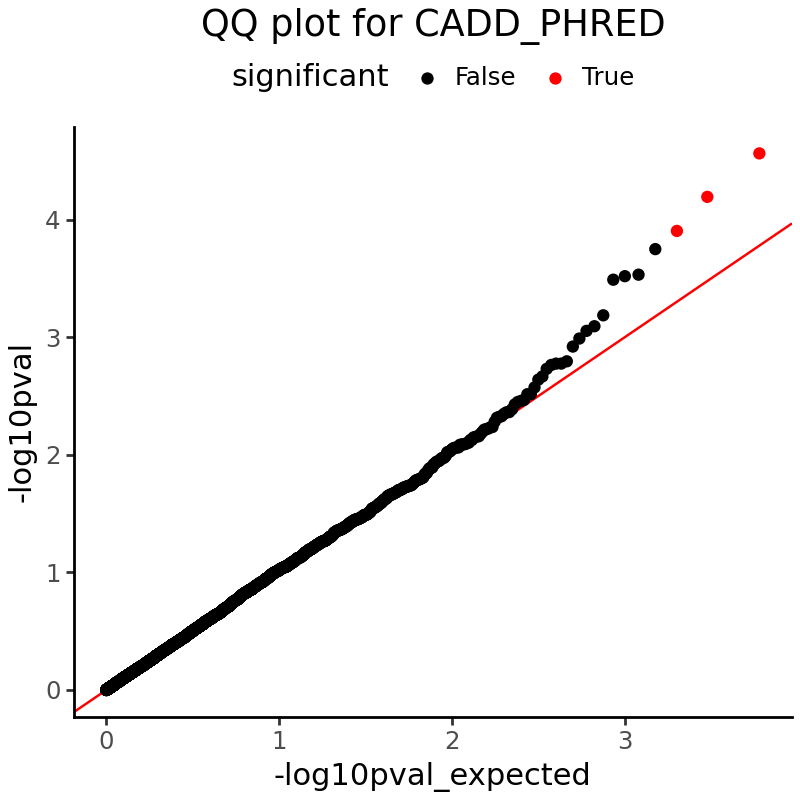

In [33]:
QQ_plot_sig_egenes(df_final_10, "CADD_PHRED")

[2025-01-28 09:17:09,809] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


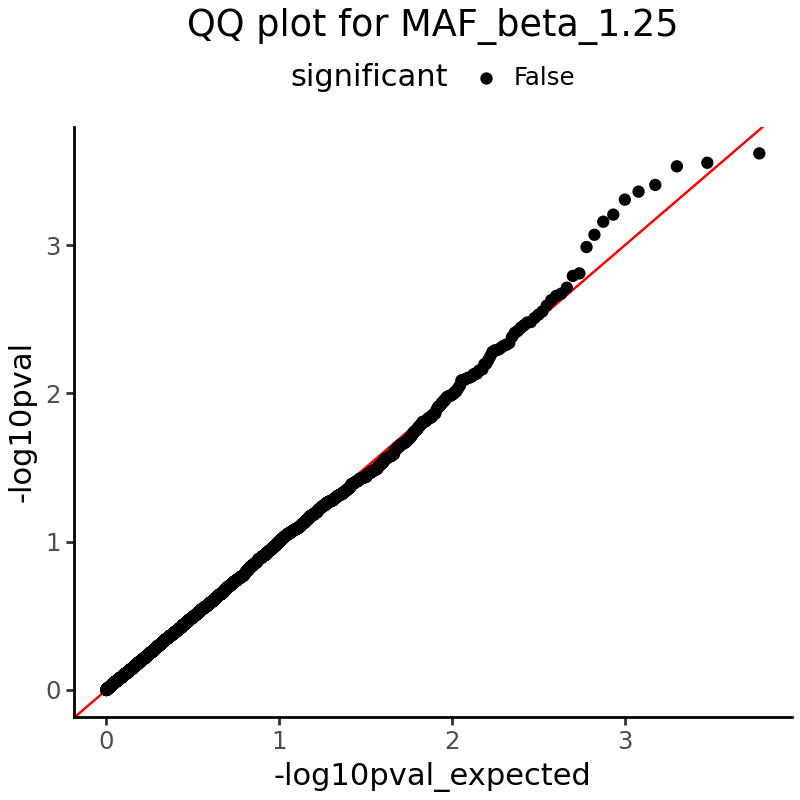

In [34]:
QQ_plot_sig_egenes(df_final_10, "MAF_beta_1.25")

## Pseudobulk computation and plot recreation


In [35]:

from cellink.tl._eqtl import _get_pb_data

In [36]:
def get_pb_data_for_ct_per_gene(data, all_burdens, eigenvec, celltype, target_chrom):
    """
    data: DonorData object, annotated (output from run_data_annotation.py)
    all_burdens: pd.DataFrame, computed burden scores (output from run_compute_burdens.py)
    eigenvec: pd.DataFrame 
                (eigenvec = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/pcdir/wgs.dose.filtered.R2_0.8.filtered.pruned.eigenvec", sep=' ', header=None)
    celltype: Str, cell type for which pb are computed
    target_chrom: Str

    returns: pb_by_gene_df, pd.DataFrame: sample id, pb_geneexpressions
    """
    eigenvec.index = eigenvec[1]
    eigenvec = eigenvec.iloc[:, 2:]
    eigenvec = eigenvec[eigenvec.index.isin(all_burdens.index.unique())]

    pb_data=_get_pb_data(
        scdata=data.adata,
        gdata=data.gdata,
        cell_type= celltype,
        target_chromosome= target_chrom,
        donor_key_in_scdata = "individual",
        sex_key_in_scdata = "sex",
        age_key_in_scdata = "age",
        pseudobulk_aggregation_type= "mean",
        min_individuals_threshold=10,
        n_top_genes = 5_000,
        n_sc_comps= 15,
        n_genetic_pcs= 20,
        n_cellstate_comps= 50,
        eigenvector_df=eigenvec
    )
    
    pb_data_all_genes = pb_data.adata.layers["mean"]
    pb_by_gene_df = pd.DataFrame(pb_data_all_genes, columns=pb_data.adata.var_names, index=pb_data.adata.obs_names)
    
    return(pb_by_gene_df)
    

In [116]:
def burdenscore_with_pb_expression(pb_by_gene_df, geneid, all_burdens, burden_type, celltype):
    """
    for a given gene, burdentype and celltype: combined info in one dataframe
    
    pb_by_gene_df: pd.DataFrame (output, get_pb_data_for_ct_per_gene)
    geneid: str
    all_burdens: pd.DataFrame, computed burden scores (output from run_compute_burdens.py)
    burden_type: Str
    celltype: Str (musst be the same as used in get_pb_data_for_ct_per_gene)

    returns: pd.DataFrame, cols: burdenscores, pb_expr, celltype
    """
    burden_type_gene=pd.DataFrame(all_burdens[all_burdens["Geneid"]==geneid][burden_type])
    # add pb expr
    burden_type_gene["pb_expr"]=pb_by_gene_df[geneid]
    burden_type_gene["cell_type"]= celltype
    return(burden_type_gene)
    

In [37]:
def plot_burden_expre_corr(burden_type_gene, burden_type, geneid):
    """
    plots the relation between pb expression and the burden score

    burden_type_gene:  pd.DataFrame (output, burdenscore_with_pb_expression, 
                            can be concatinated for multiple cell types)
    burden_type: Str 
    """
    plot = (
        ggplot(burden_type_gene, aes(x = burden_type, y = "pb_expr"))
        + labs(x = "Gene score",  title=f"Gene: {geneid}, annotation: {burden_type}")
        + theme_classic()
        + geom_smooth()
        + geom_point()
        + facet_wrap("cell_type", scales = "free")
        + theme(legend_position="top", figure_size = (5,5), plot_title=element_text(size=10))
    )
    plot
    return(plot)

In [222]:
data_chr22 = pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/annotations/chr22_data.pkl")

chr22_all_burdens = pd.read_parquet("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/burdens/chr22_all_burdens.parquet")

eigenvec = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/pcdir/wgs.dose.filtered.R2_0.8.filtered.pruned.eigenvec", sep=' ', header=None)


In [227]:
pb_by_gene_df= get_pb_data_for_ct_per_gene(data_chr22, chr22_all_burdens, eigenvec, "NK R", "22")


[2025-01-24 16:33:53,044] INFO:cellink._core.donordata: Keeping 969/981 donors
[2025-01-24 16:33:53,044] INFO:cellink._core.donordata: Dropping 12/981 donors from genetic data
[2025-01-24 16:33:53,045] INFO:cellink._core.donordata: Dropping 0/969 donors from single-cell data


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:219: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:219: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is d

In [228]:
pb_by_gene_df

Geneid     ENSG00000100181  ENSG00000177663  ENSG00000069998  ENSG00000093072  \
1_1               0.000000              0.0         0.000000         0.000000   
3_3               0.000000              0.0         0.000000         0.000000   
4_4               0.984683              0.0         0.000000         0.000000   
6_6               0.000000              0.0         0.000000         0.000000   
7_7               0.000000              0.0         0.000000         0.000000   
...                    ...              ...              ...              ...   
1077_1078         0.000000              0.0         0.429892         0.198523   
1078_1079         0.000000              0.0         0.000000         0.000000   
1079_1080         0.000000              0.0         0.660450         0.000000   
1080_1081         0.000000              0.0         0.000000         0.000000   
1081_1082         0.000000              0.0         1.394137         0.000000   

Geneid     ENSG00000131100  ENSG00000099968  ENSG00000015475  ENSG00000269220  \
1_1               0.000000         0.000000         0.000000         0.000000   
3_3               0.000000         0.000000         0.000000         0.000000   
4_4               0.473948         0.450681         0.481621         0.466926   
6_6               0.000000         0.000000         0.000000         0.000000   
7_7               1.086108         0.000000         1.086108         0.000000   
...                    ...              ...              ...              ...   
1077_1078         1.057405         0.000000         0.193553         0.195292   
1078_1079         0.000000         0.000000         0.000000         0.000000   
1079_1080         0.000000         0.000000         1.404805         0.644460   
1080_1081         0.000000         1.400779         0.000000         0.000000   
1081_1082         0.000000         2.819294         1.394137         0.000000   

Geneid     ENSG00000243156  ENSG00000215193  ...  ENSG00000100239  \
1_1               0.000000         0.000000  ...         0.000000   
3_3               0.000000         2.544693  ...         0.000000   
4_4               0.466926         0.000000  ...         0.000000   
6_6               0.000000         1.020249  ...         0.000000   
7_7               1.126083         0.000000  ...         0.000000   
...                    ...              ...  ...              ...   
1077_1078         0.219345         0.204735  ...         0.624066   
1078_1079         0.000000         5.812138  ...         0.000000   
1079_1080         0.000000         0.000000  ...         0.000000   
1080_1081         1.530374         0.000000  ...         1.400779   
1081_1082         1.288920         0.000000  ...         0.000000   

Geneid     ENSG00000100241  ENSG00000100258  ENSG00000025770  ENSG00000025708  \
1_1                    0.0         0.000000         0.000000         0.000000   
3_3                    0.0         0.000000         0.000000         0.000000   
4_4                    0.0         0.476427         0.000000         1.908843   
6_6                    0.0         0.000000         0.000000         1.063138   
7_7                    0.0         2.212191         1.126083         1.169188   
...                    ...              ...              ...              ...   
1077_1078              0.0         0.413704         0.000000         0.456997   
1078_1079              0.0         0.000000         0.000000         0.000000   
1079_1080              0.0         0.000000         0.000000         0.644460   
1080_1081              0.0         0.000000         0.000000         0.000000   
1081_1082              0.0         0.000000         0.000000         1.288920   

Geneid     ENSG00000177989  ENSG00000130487  ENSG00000100288  ENSG00000100299  \
1_1               0.000000         0.000000         0.000000         0.000000   
3_3               0.000000         0.000000         0.000000         0.000000   
4_4      

In [229]:
burdens_expr = burdenscore_with_pb_expression(pb_by_gene_df, "ENSG00000093000", chr22_all_burdens , "GENE_TSS_DISTANCE_SAIGE", "NK R")
burdens_expr

GENE_TSS_DISTANCE_SAIGE   pb_expr cell_type
id                                                    
1_1                      32.751909  0.000000      NK R
2_2                      30.026981       NaN      NK R
3_3                      22.219566  2.544693      NK R
4_4                      31.798172  0.000000      NK R
6_6                      28.401419  0.000000      NK R
...                            ...       ...       ...
1077_1078                20.440876  0.429164      NK R
1078_1079                42.742750  0.000000      NK R
1079_1080                24.595110  0.000000      NK R
1080_1081                46.450905  0.000000      NK R
1081_1082                30.241402  0.000000      NK R

[981 rows x 3 columns]

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


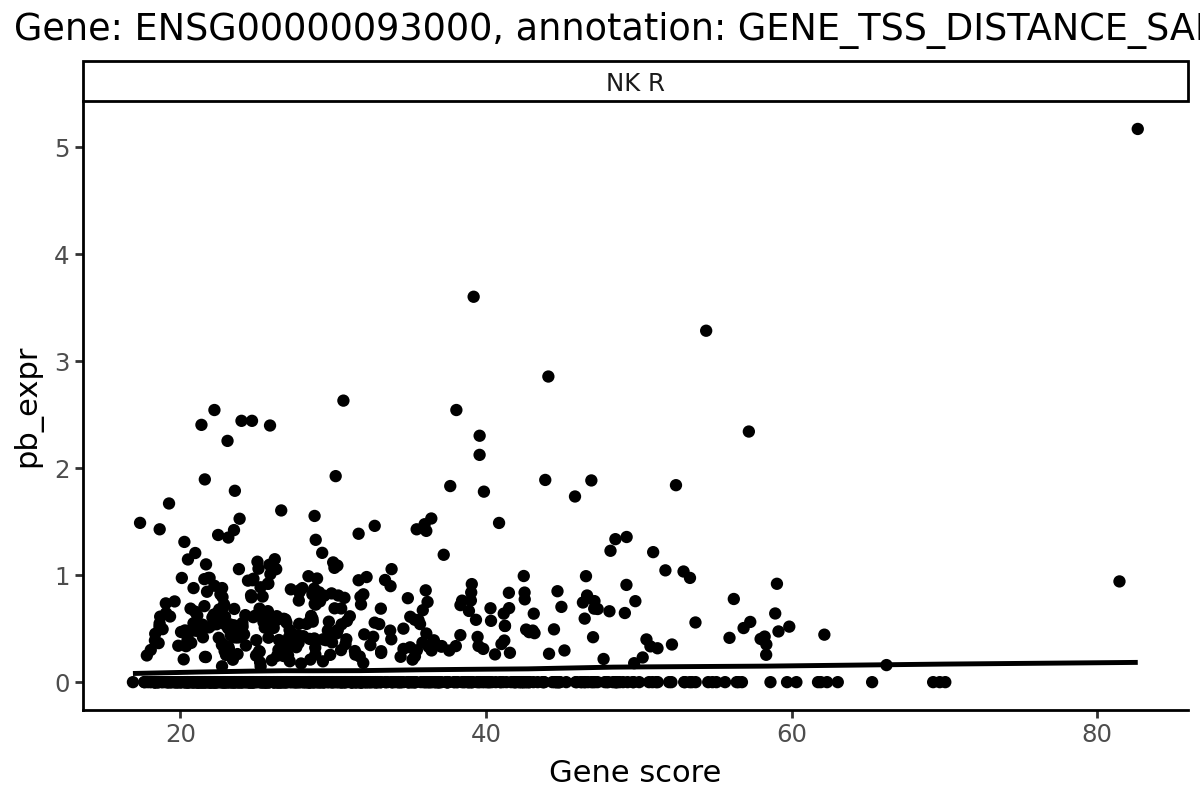

In [177]:
# here: multiple dfs of type burdens_expr could be concatinated
plot_burden_expre_corr(burdens_expr, burden_type="GENE_TSS_DISTANCE_SAIGE", geneid="ENSG00000093000")

In [188]:


def create_cor_plot(gene, cell_type, burden_type, chrom="22", data=data_chr22, burdens=chr22_all_burdens, eigenvec=eigenvec):
    pb_by_gene_df= get_pb_data_for_ct_per_gene(data, burdens, eigenvec, cell_type, chrom)
    burdens_expr = burdenscore_with_pb_expression(pb_by_gene_df, gene, burdens , burden_type, cell_type)
    return(plot_burden_expre_corr(burdens_expr, burden_type, gene))
    

In [188]:


def create_cor_plot(gene, cell_type, burden_type, chrom="22", data=data_chr22, burdens=chr22_all_burdens, eigenvec=eigenvec):
    pb_by_gene_df= get_pb_data_for_ct_per_gene(data, burdens, eigenvec, cell_type, chrom)
    burdens_expr = burdenscore_with_pb_expression(pb_by_gene_df, gene, burdens , burden_type, cell_type)
    return(plot_burden_expre_corr(burdens_expr, burden_type, gene))
    

In [192]:
df_final_ET[df_final_ET["significant"]]

burden_gene      target_gene              burden_type    pvalue  \
5  ENSG00000182858  ENSG00000182858        GENE_TSS_DISTANCE  0.000105   
6  ENSG00000100162  ENSG00000100162  GENE_TSS_DISTANCE_SAIGE  0.000062   
6  ENSG00000198911  ENSG00000198911  GENE_TSS_DISTANCE_SAIGE  0.000181   
3  ENSG00000100083  ENSG00000100083            MAF_beta_1.25  0.000155   
5  ENSG00000100083  ENSG00000100083        GENE_TSS_DISTANCE  0.000171   
6  ENSG00000100413  ENSG00000100413  GENE_TSS_DISTANCE_SAIGE  0.000282   
6  ENSG00000093000  ENSG00000093000  GENE_TSS_DISTANCE_SAIGE  0.000040   
1  ENSG00000100151  ENSG00000100151                DNA_LM_up  0.000042   
2  ENSG00000100151  ENSG00000100151              DNA_LM_down  0.000032   
4  ENSG00000100151  ENSG00000100151             DNA_LM_mixed  0.000160   

       beta cell_type chromosome  significant  FDR_corrected  \
5  0.028212    CD8 ET         22         True       0.038711   
6  0.021745    CD8 ET         22         True       0.023041   
6  0.276008    Plasma         22         True       0.048295   
3  0.253508      NK R         22         True       0.039246   
5  0.253224      NK R         22         True       0.043384   
6  0.118694      NK R         22         True       0.035848   
6  0.170273      NK R         22         True       0.010045   
1  0.171683  CD4 SOX4         22         True       0.007963   
2  0.174621  CD4 SOX4         22         True       0.006067   
4  0.158940  CD4 SOX4         22         True       0.030115   

              celltype-annotation  
5        CD8 ET-GENE_TSS_DISTANCE  
6  CD8 ET-GENE_TSS_DISTANCE_SAIGE  
6  Plasma-GENE_TSS_DISTANCE_SAIGE  
3              NK R-MAF_beta_1.25  
5          NK R-GENE_TSS_DISTANCE  
6    NK R-GENE_TSS_DISTANCE_SAIGE  
6    NK R-GENE_TSS_DISTANCE_SAIGE  
1              CD4 SOX4-DNA_LM_up  
2            CD4 SOX4-DNA_LM_down  
4           CD4 SOX4-DNA_LM_mixed

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.


[2025-01-24 16:41:05,089] INFO:cellink._core.donordata: Keeping 981/981 donors
[2025-01-24 16:41:05,090] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2025-01-24 16:41:05,090] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data


/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:219: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:219: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
/opt/modules/i12g/anaconda/e

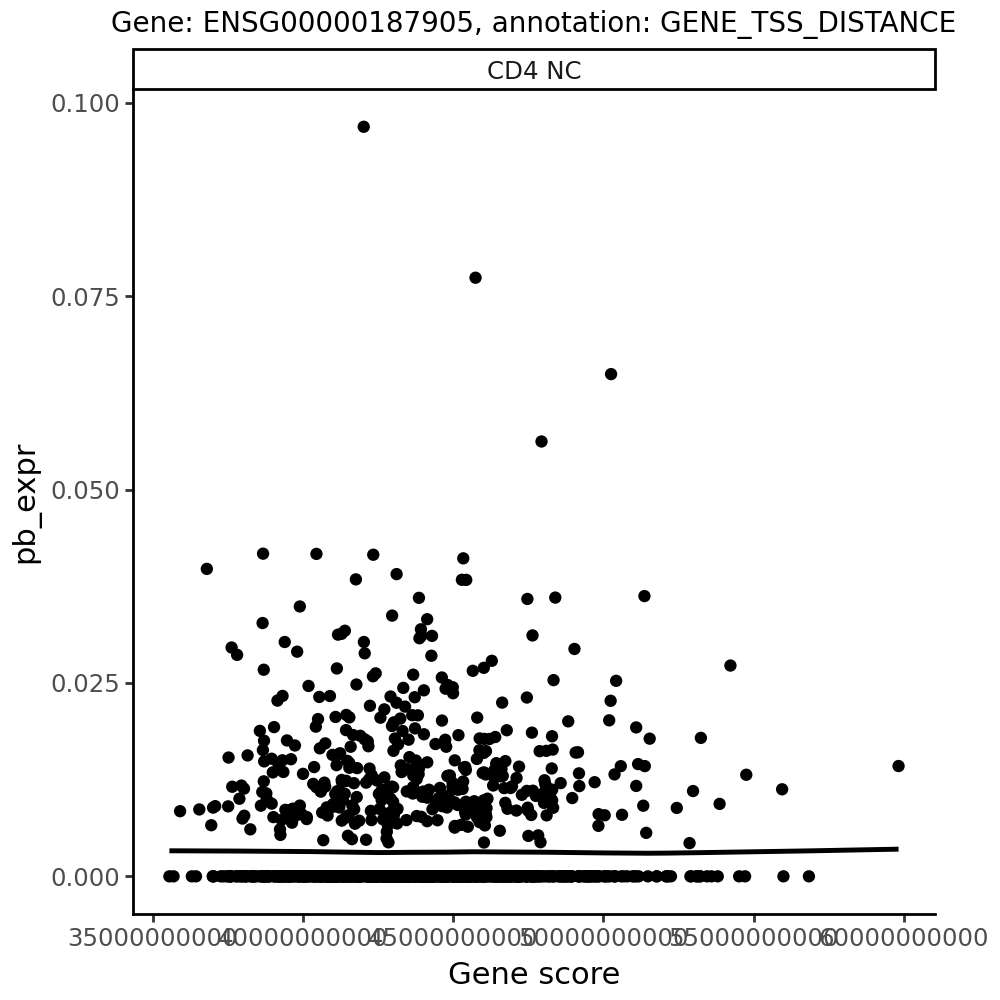

In [238]:
create_cor_plot(gene="ENSG00000187905", cell_type="CD4 NC", burden_type="GENE_TSS_DISTANCE")


In [231]:
df_final_ET[df_final_ET["significant"]].sort_values(by='FDR_corrected')

burden_gene      target_gene              burden_type        pvalue  \
5   ENSG00000244752  ENSG00000244752        GENE_TSS_DISTANCE  1.591353e-22   
5   ENSG00000244752  ENSG00000244752        GENE_TSS_DISTANCE  9.573160e-18   
0   ENSG00000244752  ENSG00000244752               CADD_PHRED  2.135824e-16   
5   ENSG00000244752  ENSG00000244752        GENE_TSS_DISTANCE  5.019416e-15   
3   ENSG00000244752  ENSG00000244752            MAF_beta_1.25  1.022285e-13   
..              ...              ...                      ...           ...   
3   ENSG00000244752  ENSG00000244752            MAF_beta_1.25  2.682350e-04   
5   ENSG00000184117  ENSG00000184117        GENE_TSS_DISTANCE  1.677499e-04   
6   ENSG00000198911  ENSG00000198911  GENE_TSS_DISTANCE_SAIGE  1.808751e-04   
3   ENSG00000185608  ENSG00000185608            MAF_beta_1.25  6.192517e-04   
3   ENSG00000177663  ENSG00000177663            MAF_beta_1.25  6.763201e-04   

        beta cell_type chromosome  significant  FDR_corrected  \
5   0.031611    CD4 NC         22         True   6.540460e-20   
5   0.037962    CD8 ET         22         True   3.532496e-15   
0   0.026757    CD4 NC         22         True   8.778237e-14   
5   0.038019        NK         22         True   1.902359e-12   
3   0.024315    CD4 NC         22         True   4.201591e-11   
..       ...       ...        ...          ...            ...   
3   0.021058      B IN         22         True   4.466113e-02   
5   0.141070   Mono NC         22         True   4.764098e-02   
6   0.276008    Plasma         22         True   4.829365e-02   
3  -0.041629    CD8 ET         22         True   4.991242e-02   
3   0.026120    CD8 ET         22         True   4.991242e-02   

               celltype-annotation  
5         CD4 NC-GENE_TSS_DISTANCE  
5         CD8 ET-GENE_TSS_DISTANCE  
0                CD4 NC-CADD_PHRED  
5             NK-GENE_TSS_DISTANCE  
3             CD4 NC-MAF_beta_1.25  
..                             ...  
3               B IN-MAF_beta_1.25  
5        Mono NC-GENE_TSS_DISTANCE  
6   Plasma-GENE_TSS_DISTANCE_SAIGE  
3             CD8 ET-MAF_beta_1.25  
3             CD8 ET-MAF_beta_1.25  

[90 rows x 10 columns]